In [57]:
pip install kneed

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
import scipy.stats as statsx
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
%matplotlib inline

Untuk latihan pada kali ini, kita akan memakai dataset bawaan dari Google Colab yaitu dataset `company_data.csv`

**SUPERVISED LEARNING - REGRESI**

In [59]:
# membaca dataset ke dataframe
df = pd.read_csv('company_data.csv')
df.head()

Unnamed: 0    company  employee_turnover  revenue_growth  rd_investment  \
0           0  Company_1               90.2            10.0           7.58   
1           1  Company_2               16.6            28.0           6.55   
2           2  Company_3               27.3            38.4           4.17   
3           3  Company_4              119.0            62.3           2.85   
4           4  Company_5               10.3            45.5           6.03   

   operational_cost  average_salary  market_volatility  average_tenure  \
0              44.9            1610               9.44            56.2   
1              48.6            9930               4.49            76.3   
2              31.4           12900              16.10            76.5   
3              42.9            5900              22.40            60.1   
4              58.9           19100               1.44            76.8   

   growth_potential  net_profit  
0              5.82         553  
1              1.65        4090  
2              2.89        4460  
3              6.16        3530  
4              2.13       12200

### Exploratory Data Analysis


In [60]:
# melihat cuplikan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         167 non-null    int64  
 1   company            167 non-null    object 
 2   employee_turnover  167 non-null    float64
 3   revenue_growth     167 non-null    float64
 4   rd_investment      167 non-null    float64
 5   operational_cost   167 non-null    float64
 6   average_salary     167 non-null    int64  
 7   market_volatility  167 non-null    float64
 8   average_tenure     167 non-null    float64
 9   growth_potential   167 non-null    float64
 10  net_profit         167 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 14.5+ KB


In [61]:
df.nunique() #menghitung jumlah nilai unik (distinct) pada setiap kolom dari DataFrame

Unnamed: 0           167
company              167
employee_turnover    139
revenue_growth       147
rd_investment        147
operational_cost     151
average_salary       156
market_volatility    156
average_tenure       127
growth_potential     138
net_profit           157
dtype: int64

In [62]:
df.describe() #menghasilkan statistik ringkasan (summary statistics) dari kolom-kolom numerik dalam DataFrame

Unnamed: 0  employee_turnover  revenue_growth  rd_investment  \
count   167.00000         167.000000      167.000000     167.000000   
mean     83.00000          38.270060       41.108976       6.815689   
std      48.35287          40.328931       27.412010       2.746837   
min       0.00000           2.600000        0.109000       1.810000   
25%      41.50000           8.250000       23.800000       4.920000   
50%      83.00000          19.300000       35.000000       6.320000   
75%     124.50000          62.100000       51.350000       8.600000   
max     166.00000         208.000000      200.000000      17.900000   

       operational_cost  average_salary  market_volatility  average_tenure  \
count        167.000000      167.000000         167.000000      167.000000   
mean          46.890215    17144.688623           7.781832       70.555689   
std           24.209589    19278.067698          10.570704        8.893172   
min            0.065900      609.000000          -4.210000       32.100000   
25%           30.200000     3355.000000           1.810000       65.300000   
50%           43.300000     9960.000000           5.390000       73.100000   
75%           58.750000    22800.000000          10.750000       76.800000   
max          174.000000   125000.000000         104.000000       82.800000   

       growth_potential     net_profit  
count        167.000000     167.000000  
mean           2.947964   12964.155689  
std            1.513848   18328.704809  
min            1.150000     231.000000  
25%            1.795000    1330.000000  
50%            2.410000    4660.000000  
75%            3.880000   14050.000000  
max            7.490000  105000.000000

In [63]:
df.describe(include=["O"]) #menghasilkan statistik deskriptif khusus untuk kolom bertipe objek (biasanya string/teks atau kategori non-numerik) dalam DataFrame

company
count         167
unique        167
top     Company_1
freq            1

- Kolom company memiliki 167 nilai (count = 167)

- Setiap nilai di kolom tersebut unik (unique = 167)

- Nilai yang paling sering muncul (top) adalah Company_1

- Tapi frekuensinya hanya 1 (freq = 1), artinya semua nilai muncul satu kali saja

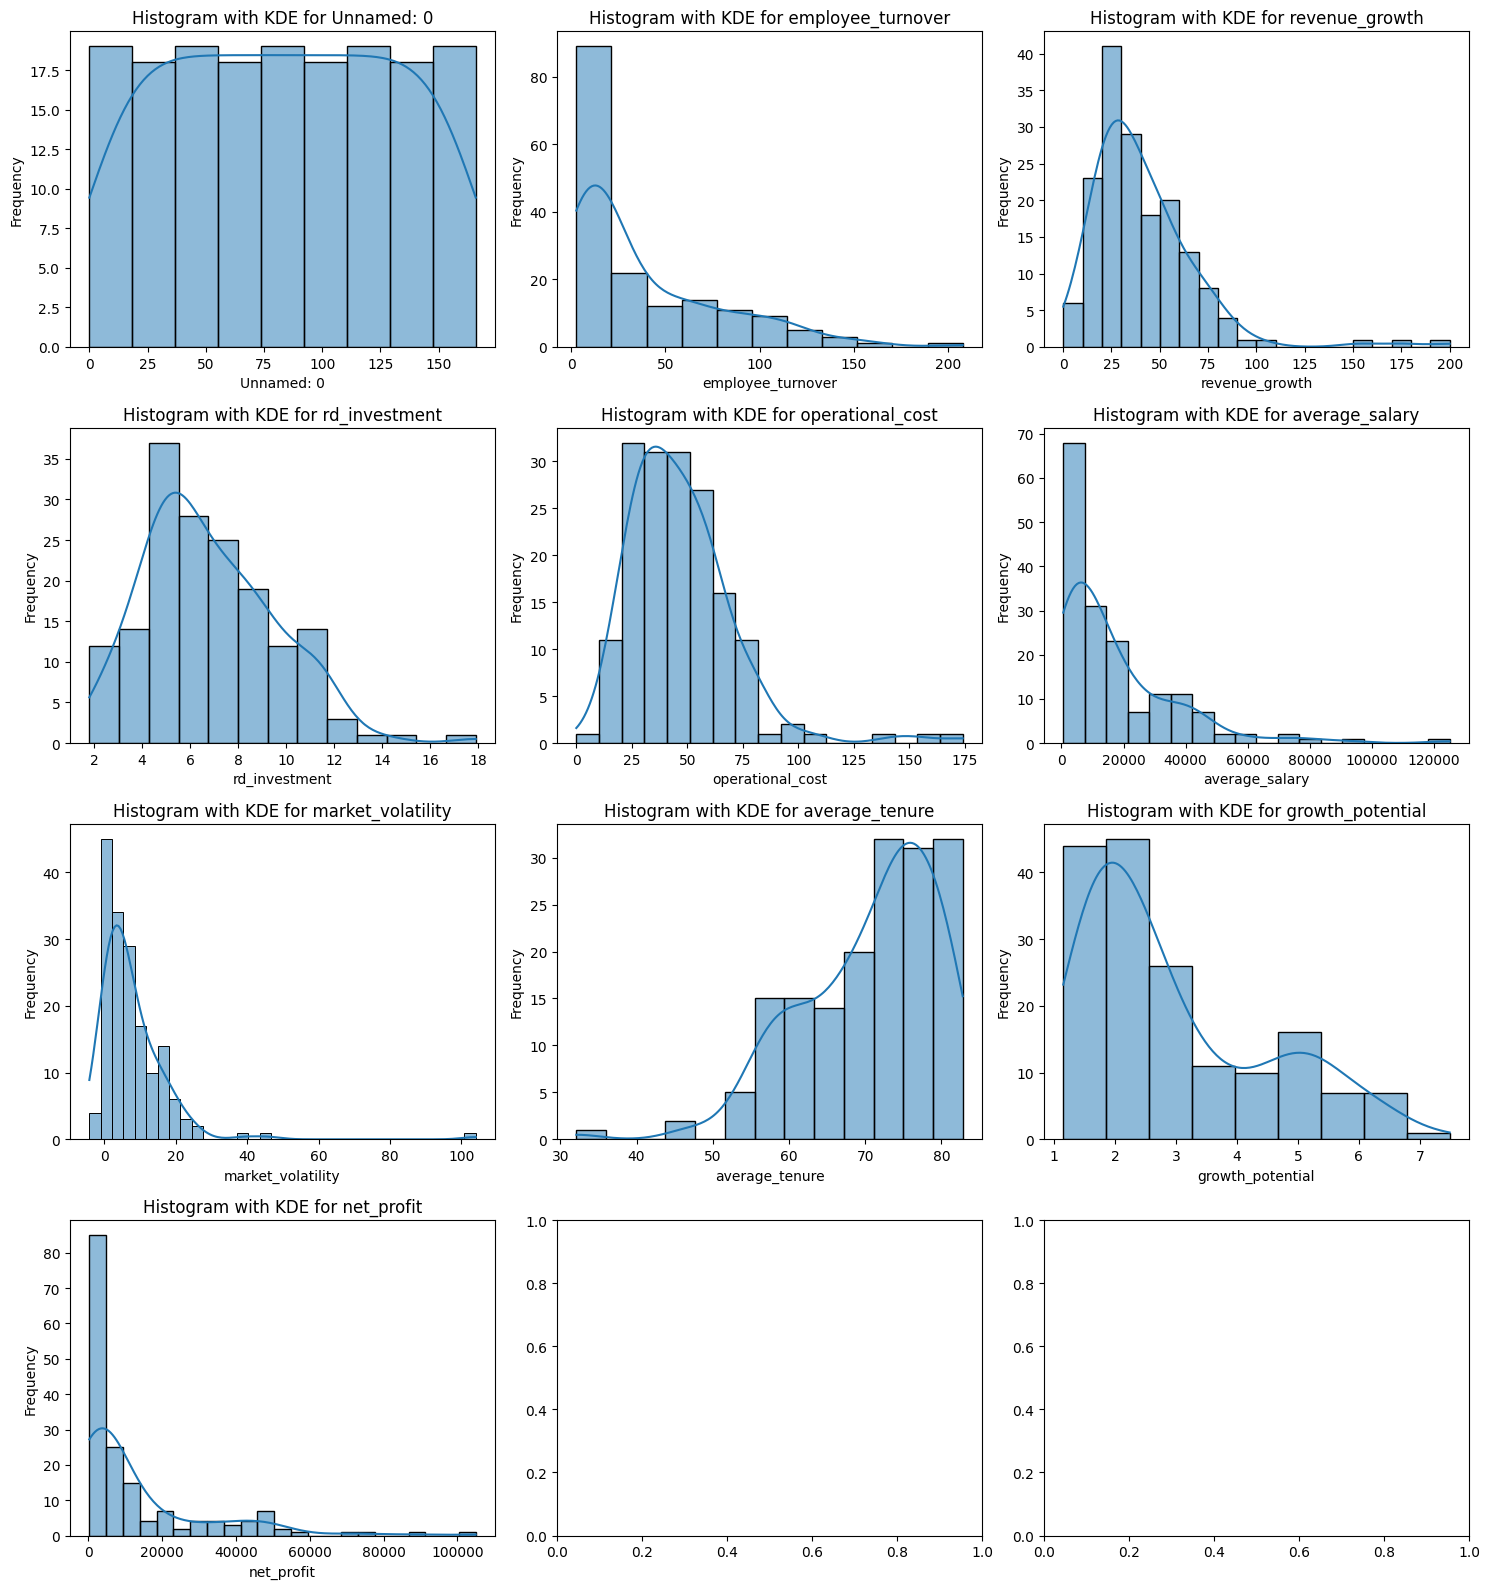

In [64]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Ceiling division

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
fig.tight_layout(pad=5.0)

# Plot each histogram
for i, column in enumerate(numerical_columns):
    ax = axes[i//n_cols, i%n_cols]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram with KDE for {column}')

# Adjust layout
fig.tight_layout()

plt.show()

In [65]:
df.nunique()

Unnamed: 0           167
company              167
employee_turnover    139
revenue_growth       147
rd_investment        147
operational_cost     151
average_salary       156
market_volatility    156
average_tenure       127
growth_potential     138
net_profit           157
dtype: int64

In [66]:
kolom_yang_dihapus = ["Unnamed: 0"]


df = df.drop(kolom_yang_dihapus, axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            167 non-null    object 
 1   employee_turnover  167 non-null    float64
 2   revenue_growth     167 non-null    float64
 3   rd_investment      167 non-null    float64
 4   operational_cost   167 non-null    float64
 5   average_salary     167 non-null    int64  
 6   market_volatility  167 non-null    float64
 7   average_tenure     167 non-null    float64
 8   growth_potential   167 non-null    float64
 9   net_profit         167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [68]:
df[df.duplicated(keep="first")]

Empty DataFrame
Columns: [company, employee_turnover, revenue_growth, rd_investment, operational_cost, average_salary, market_volatility, average_tenure, growth_potential, net_profit]
Index: []

<Axes: >

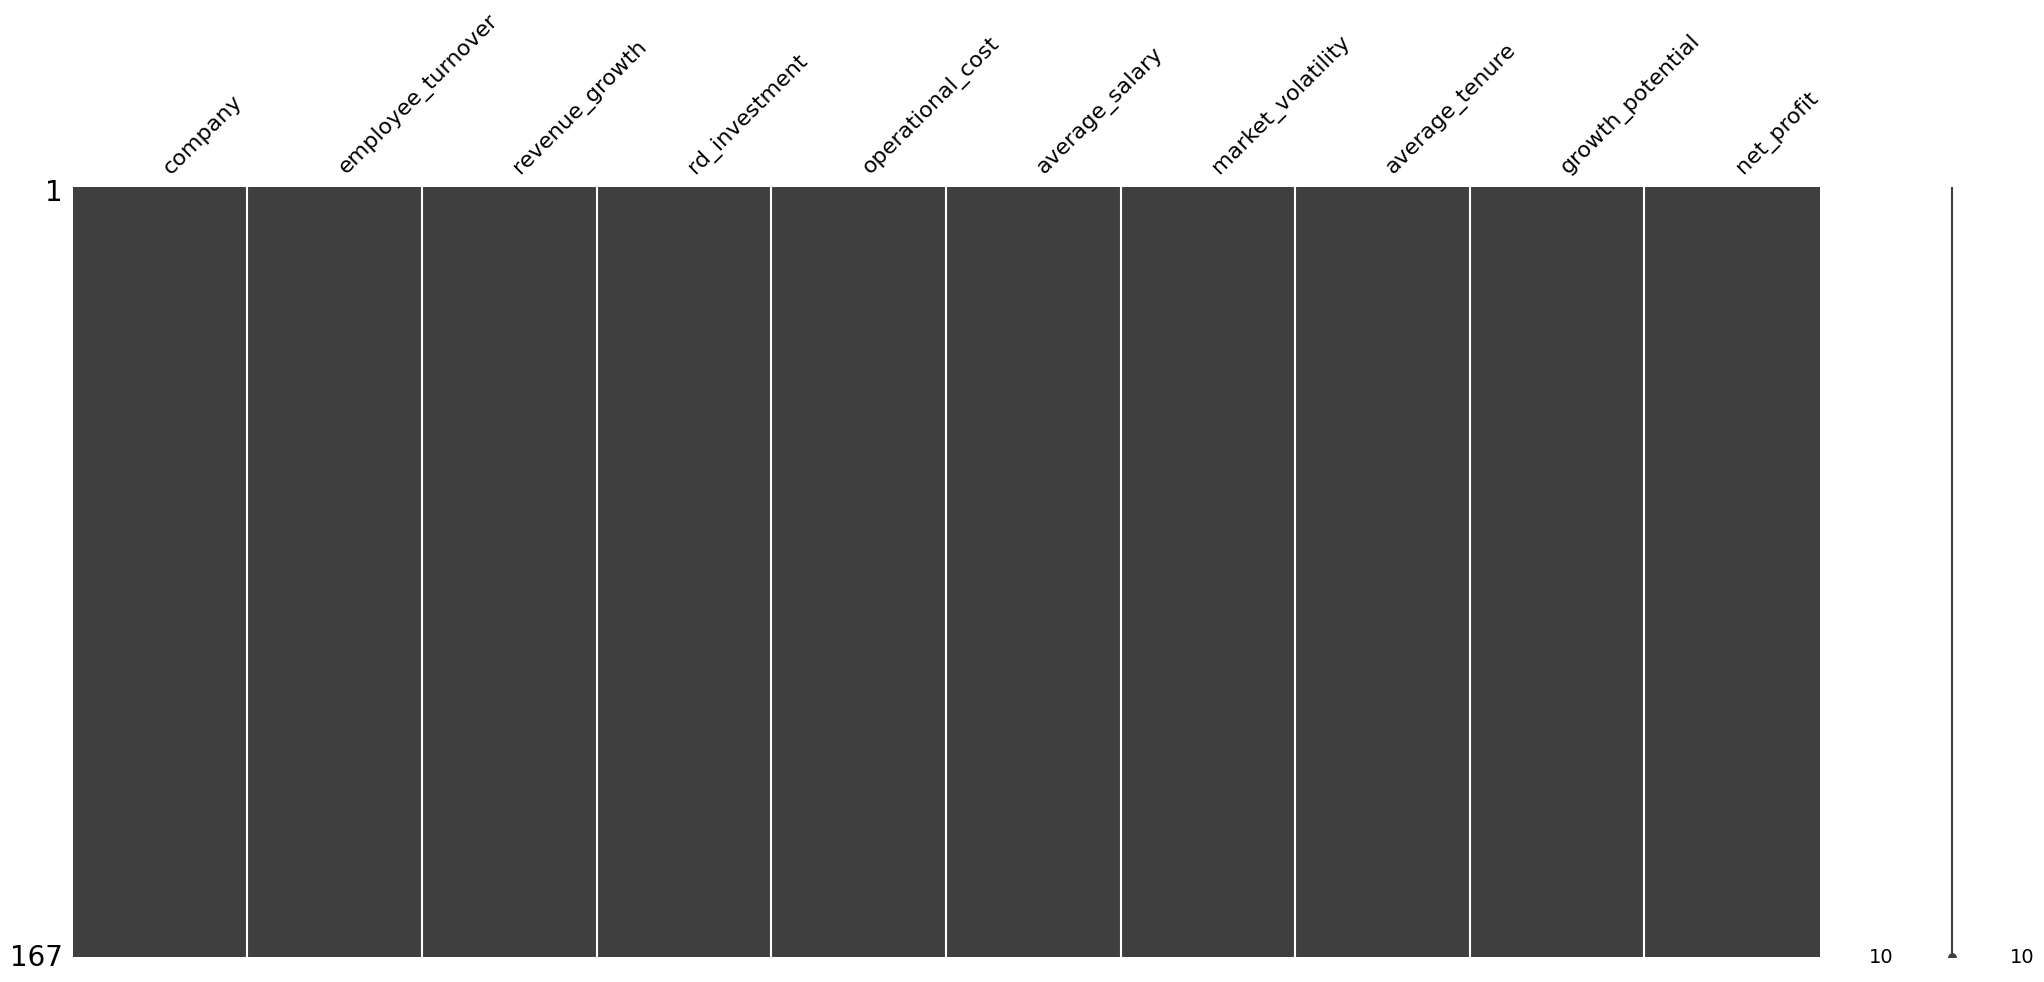

In [69]:
msno.matrix(df)

<Axes: >

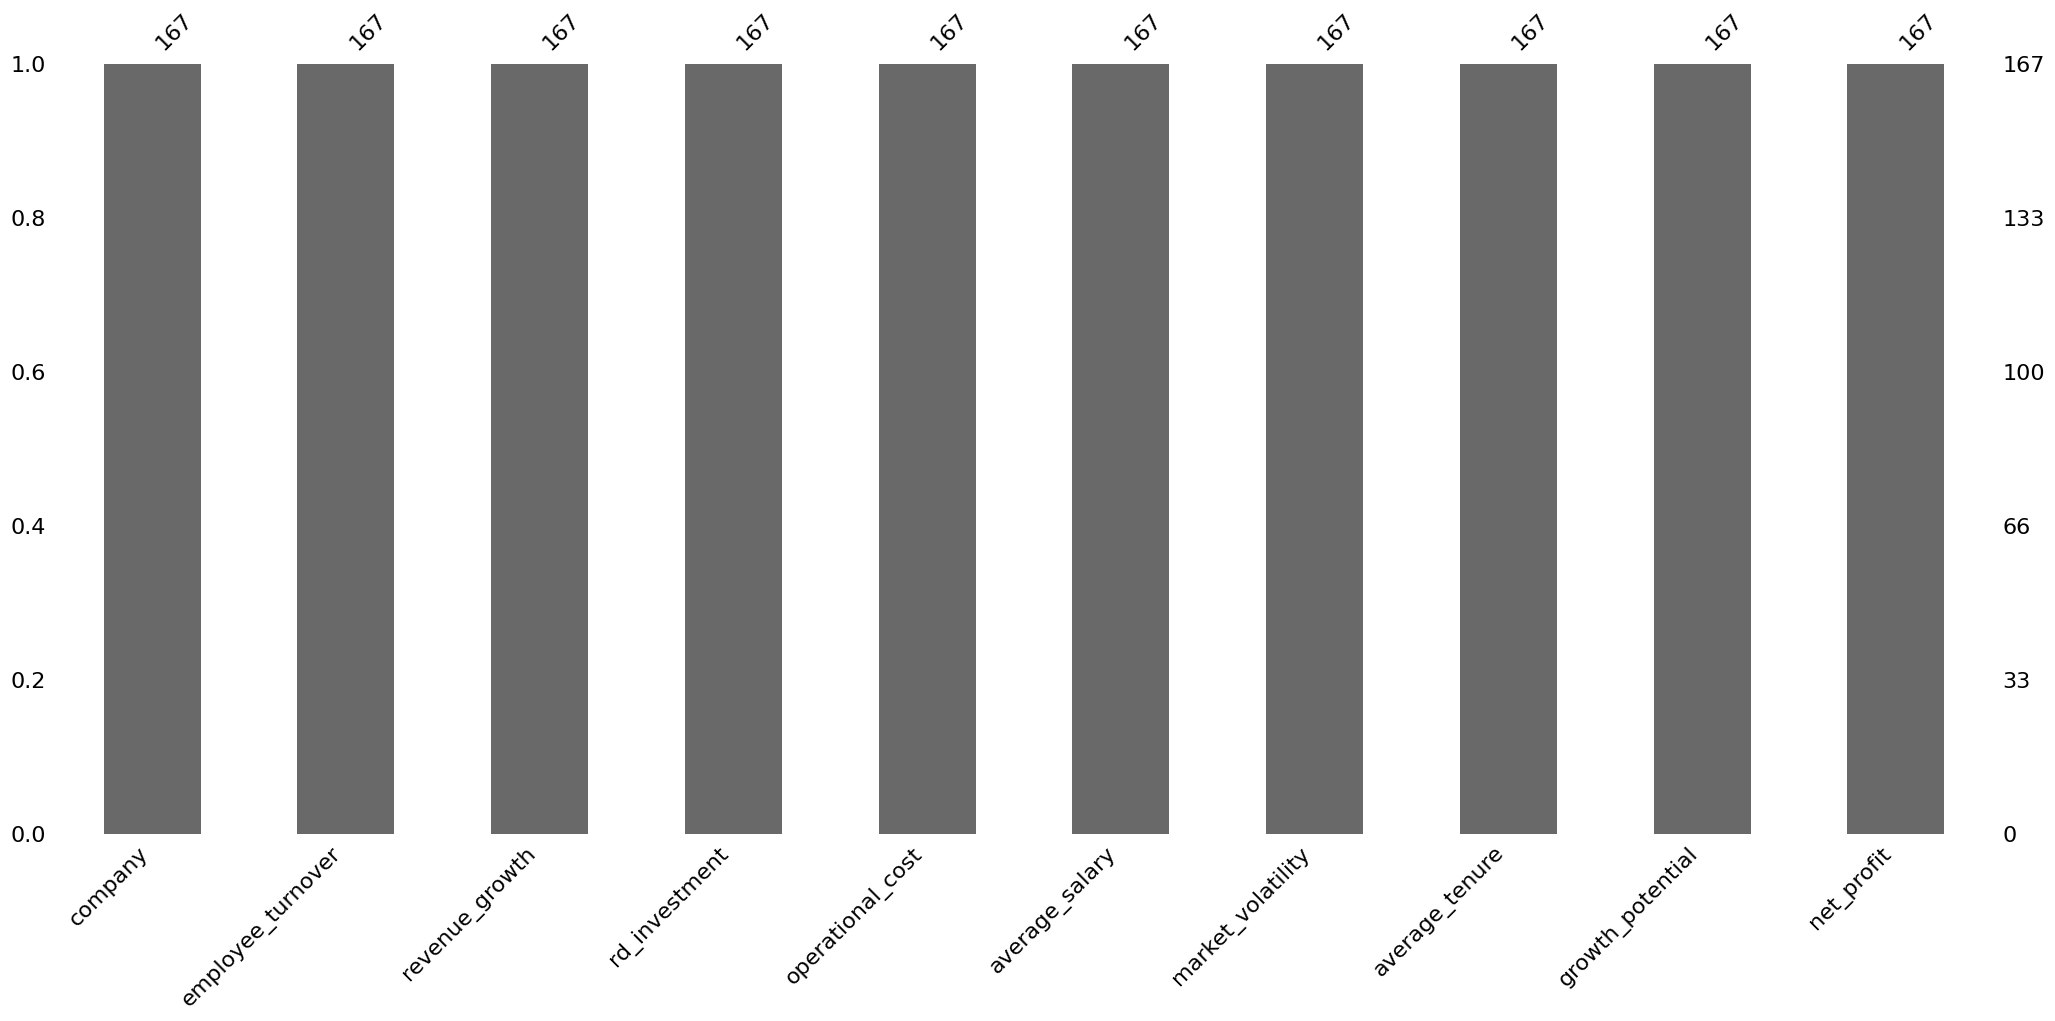

In [70]:
msno.bar(df)

In [71]:
# Identifying missing values in the train dataset
missing_values = df.isnull().sum()

missing_values_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame(
    {
        "Total Missing": missing_values,
        "Percentage Missing (%)": missing_values_percentage,
    }
)

missing_data[missing_data["Total Missing"] >= 0].sort_values(
    by="Percentage Missing (%)", ascending=False
)

Total Missing  Percentage Missing (%)
company                        0                     0.0
employee_turnover              0                     0.0
revenue_growth                 0                     0.0
rd_investment                  0                     0.0
operational_cost               0                     0.0
average_salary                 0                     0.0
market_volatility              0                     0.0
average_tenure                 0                     0.0
growth_potential               0                     0.0
net_profit                     0                     0.0

In [72]:
df["net_profit_margin"] = df["net_profit"] / (
    df["revenue_growth"] * 10
)  # revenue is in percentage

# Adding operational efficiency (operational cost as a percentage of revenue)
df["operational_efficiency"] = df["operational_cost"] / (
    df["revenue_growth"] * 10
)  # revenue is in percentage

# The financial health score will be a weighted sum of revenue growth (40%), net profit margin (40%), and
# inverse of operational efficiency (20%), where higher operational efficiency is better, so we subtract it.
df["financial_health_score"] = (
    0.4 * df["revenue_growth"]
    + 0.4 * df["net_profit_margin"]
    - 0.2 * df["operational_efficiency"]
)

# Let's also normalize the financial health score to have a better sense of its distribution
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["financial_health_score_normalized"] = scaler.fit_transform(
    df[["financial_health_score"]]
)

# Display the first few rows with the new feature
df[["company", "financial_health_score", "financial_health_score_normalized"]].head()

company  financial_health_score  financial_health_score_normalized
0  Company_1                6.122200                           0.004486
1  Company_2               17.008143                           0.034886
2  Company_3               19.989479                           0.043212
3  Company_4               27.172681                           0.063272
4  Company_5               28.899385                           0.068094

In [73]:
kolom_yang_dihapus = ["company", "financial_health_score"]

df = df.drop(kolom_yang_dihapus, axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   employee_turnover                  167 non-null    float64
 1   revenue_growth                     167 non-null    float64
 2   rd_investment                      167 non-null    float64
 3   operational_cost                   167 non-null    float64
 4   average_salary                     167 non-null    int64  
 5   market_volatility                  167 non-null    float64
 6   average_tenure                     167 non-null    float64
 7   growth_potential                   167 non-null    float64
 8   net_profit                         167 non-null    int64  
 9   net_profit_margin                  167 non-null    float64
 10  operational_efficiency             167 non-null    float64
 11  financial_health_score_normalized  167 non-null    float64

In [75]:
def handle_outliers_with_median(df, column):
    median = df[column].median()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound), median, df[column]
    )
    return df


# Applying the function to all columns in the dataframe
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:  # Apply only to numerical columns
        df = handle_outliers_with_median(df, col)

df.describe()

employee_turnover  revenue_growth  rd_investment  operational_cost  \
count         167.000000      167.000000     167.000000        167.000000   
mean           34.738323       37.816760       6.699162         44.466263   
std            34.794706       19.139999       2.542794         18.359522   
min             2.600000        0.109000       1.810000          0.065900   
25%             8.250000       23.800000       4.920000         30.200000   
50%            19.300000       35.000000       6.320000         43.300000   
75%            55.600000       50.500000       8.455000         57.400000   
max           137.000000       86.900000      13.100000        101.000000   

       average_salary  market_volatility  average_tenure  growth_potential  \
count      167.000000          167.00000      167.000000        167.000000   
mean     13909.239521            6.50309       71.113772          2.917545   
std      12894.978402            5.99342        7.955834          1.472504   
min        609.000000           -4.21000       52.000000          1.150000   
25%       3355.000000            1.81000       65.500000          1.795000   
50%       9960.000000            5.39000       73.100000          2.410000   
75%      19750.000000            9.34500       76.800000          3.845000   
max      49400.000000           23.60000       82.800000          6.590000   

         net_profit  net_profit_margin  operational_efficiency  \
count    167.000000         167.000000              167.000000   
mean    6089.305389          16.740764                0.116401   
std     6580.330483          16.505696                0.040203   
min      231.000000           0.812652                0.032756   
25%     1330.000000           5.329706                0.088214   
50%     4660.000000          13.625498                0.111950   
75%     7325.000000          19.685408                0.139982   
max    30800.000000          80.000000                0.250000   

       financial_health_score_normalized  
count                         167.000000  
mean                            0.061904  
std                             0.045790  
min                             0.000000  
25%                             0.030104  
50%                             0.051326  
75%                             0.081019  
max                             0.189040

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   employee_turnover                  167 non-null    float64
 1   revenue_growth                     167 non-null    float64
 2   rd_investment                      167 non-null    float64
 3   operational_cost                   167 non-null    float64
 4   average_salary                     167 non-null    float64
 5   market_volatility                  167 non-null    float64
 6   average_tenure                     167 non-null    float64
 7   growth_potential                   167 non-null    float64
 8   net_profit                         167 non-null    float64
 9   net_profit_margin                  167 non-null    float64
 10  operational_efficiency             167 non-null    float64
 11  financial_health_score_normalized  167 non-null    float64

(employee_turnover    1.450774
 revenue_growth       2.445824
 rd_investment        0.705746
 operational_cost     1.905276
 average_salary       2.231480
 market_volatility    5.154049
 average_tenure      -0.970996
 growth_potential     0.967092
 net_profit           2.218051
 dtype: float64,
 employee_turnover                    1.197090
 revenue_growth                       0.584619
 rd_investment                        0.374441
 operational_cost                     0.465036
 average_salary                       1.114223
 market_volatility                    0.930986
 average_tenure                      -0.563460
 growth_potential                     0.934356
 net_profit                           1.950258
 net_profit_margin                    1.852234
 operational_efficiency               0.806268
 financial_health_score_normalized    1.095427
 dtype: float64)

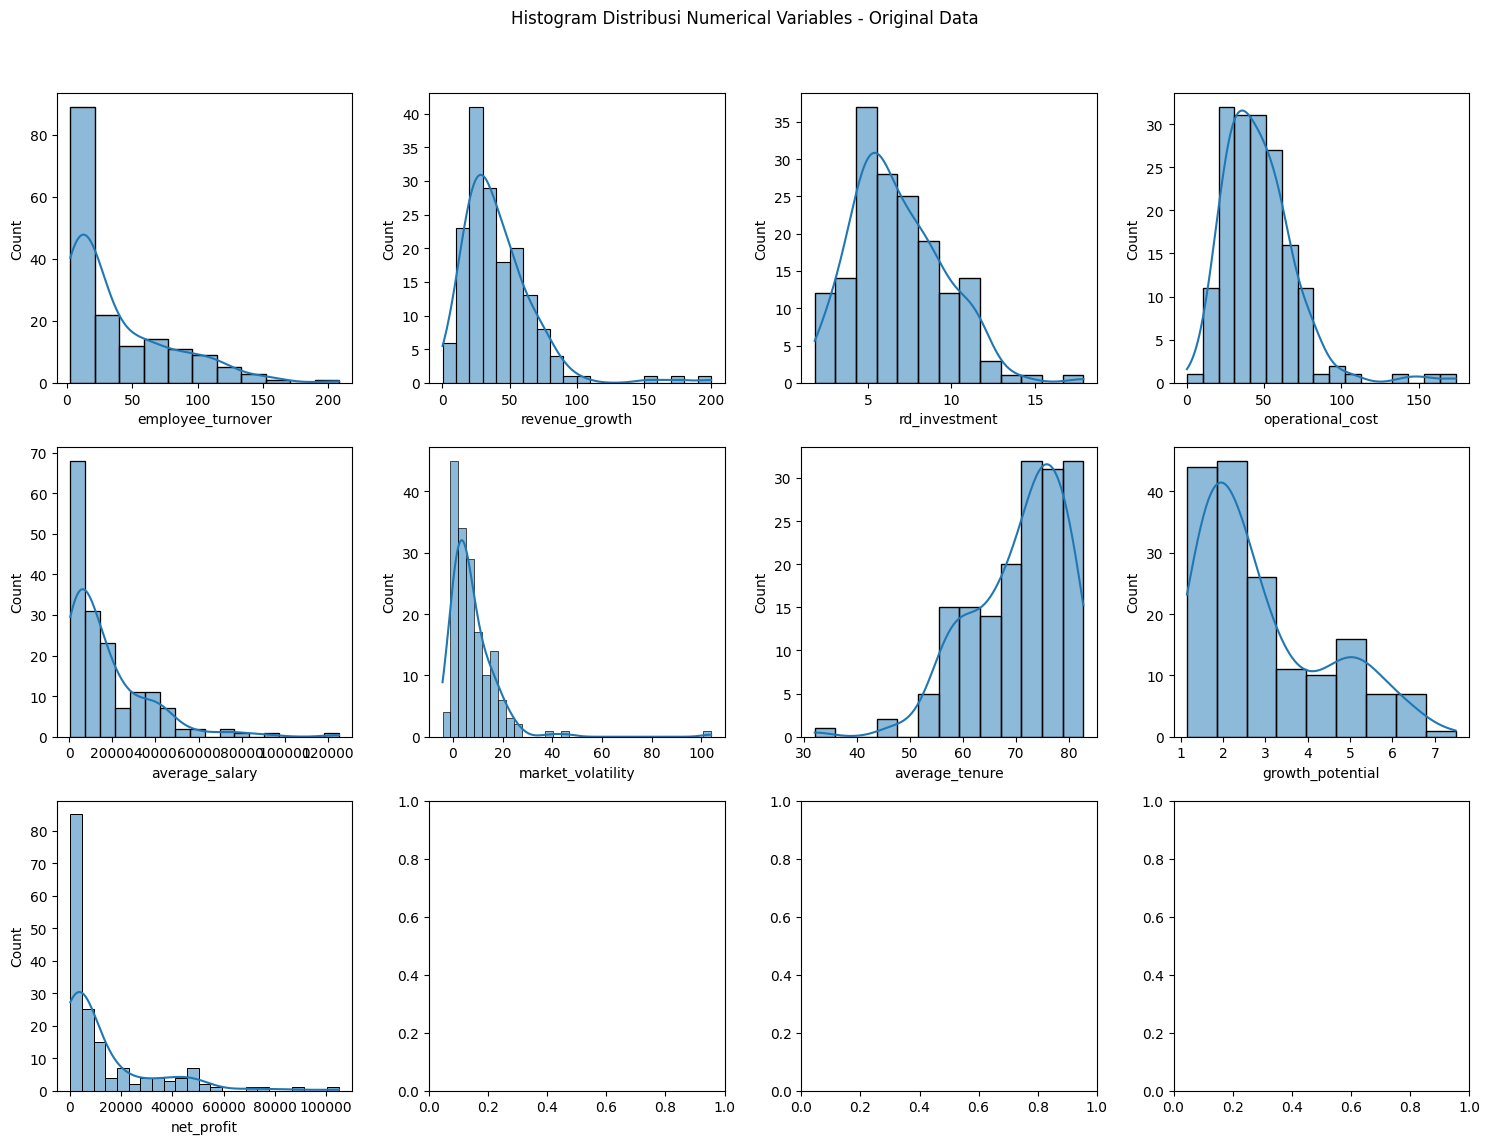

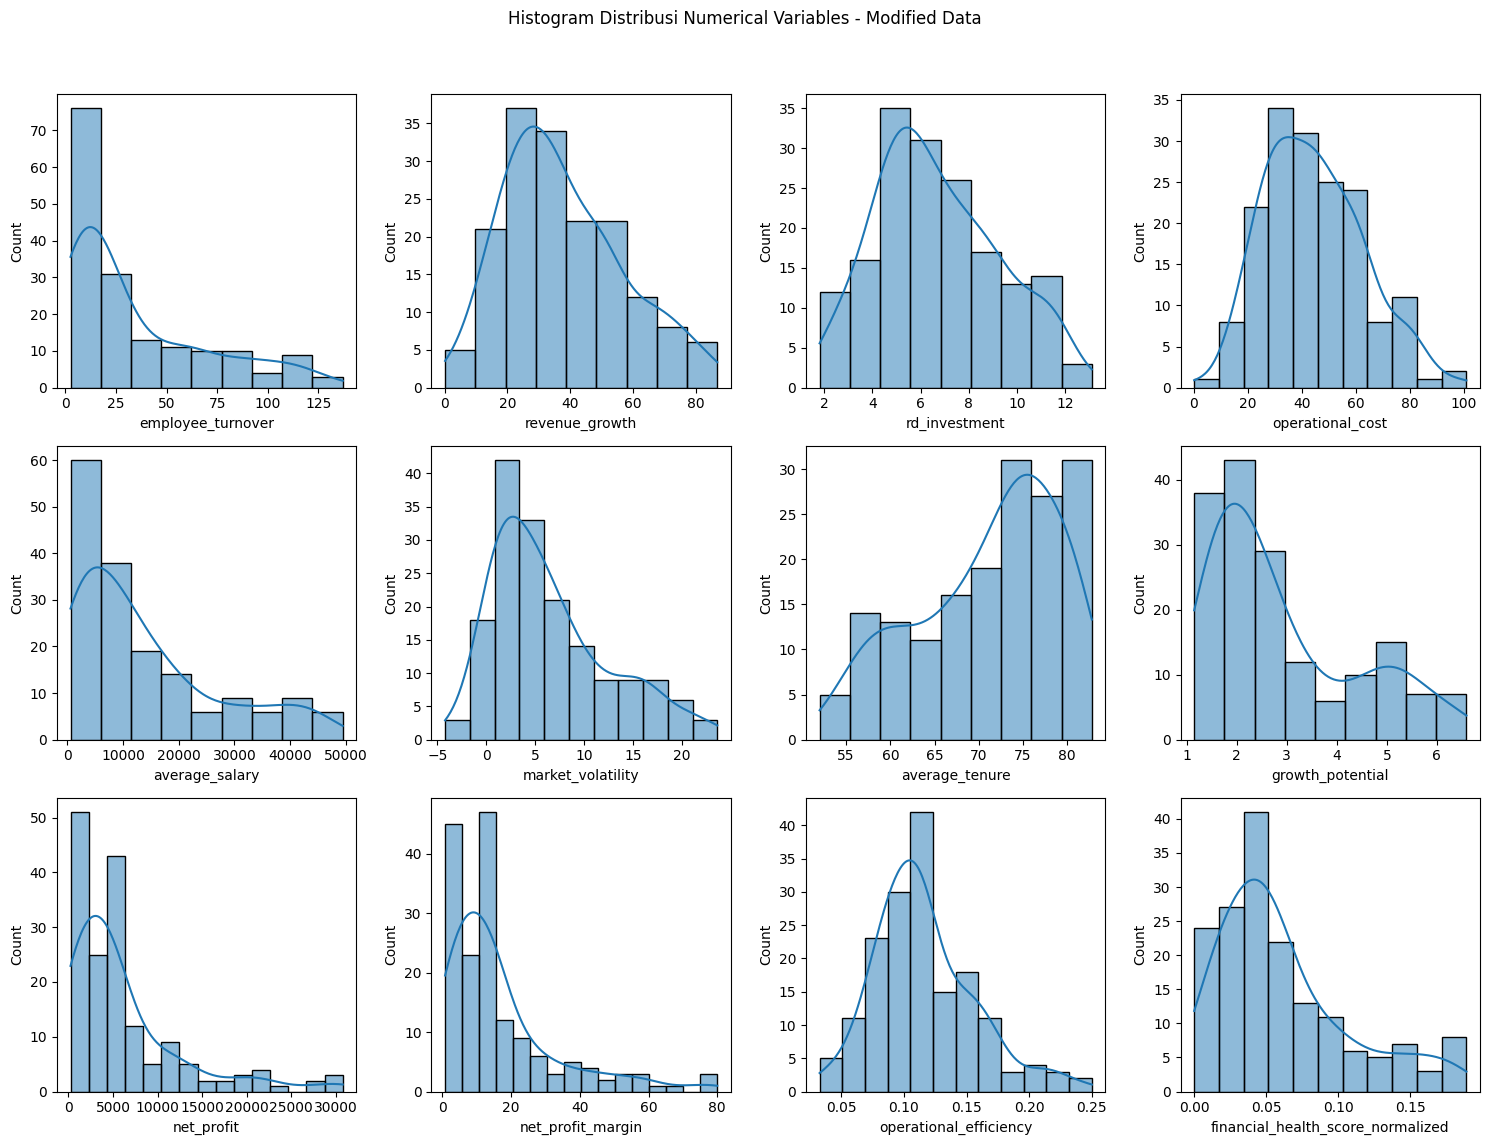

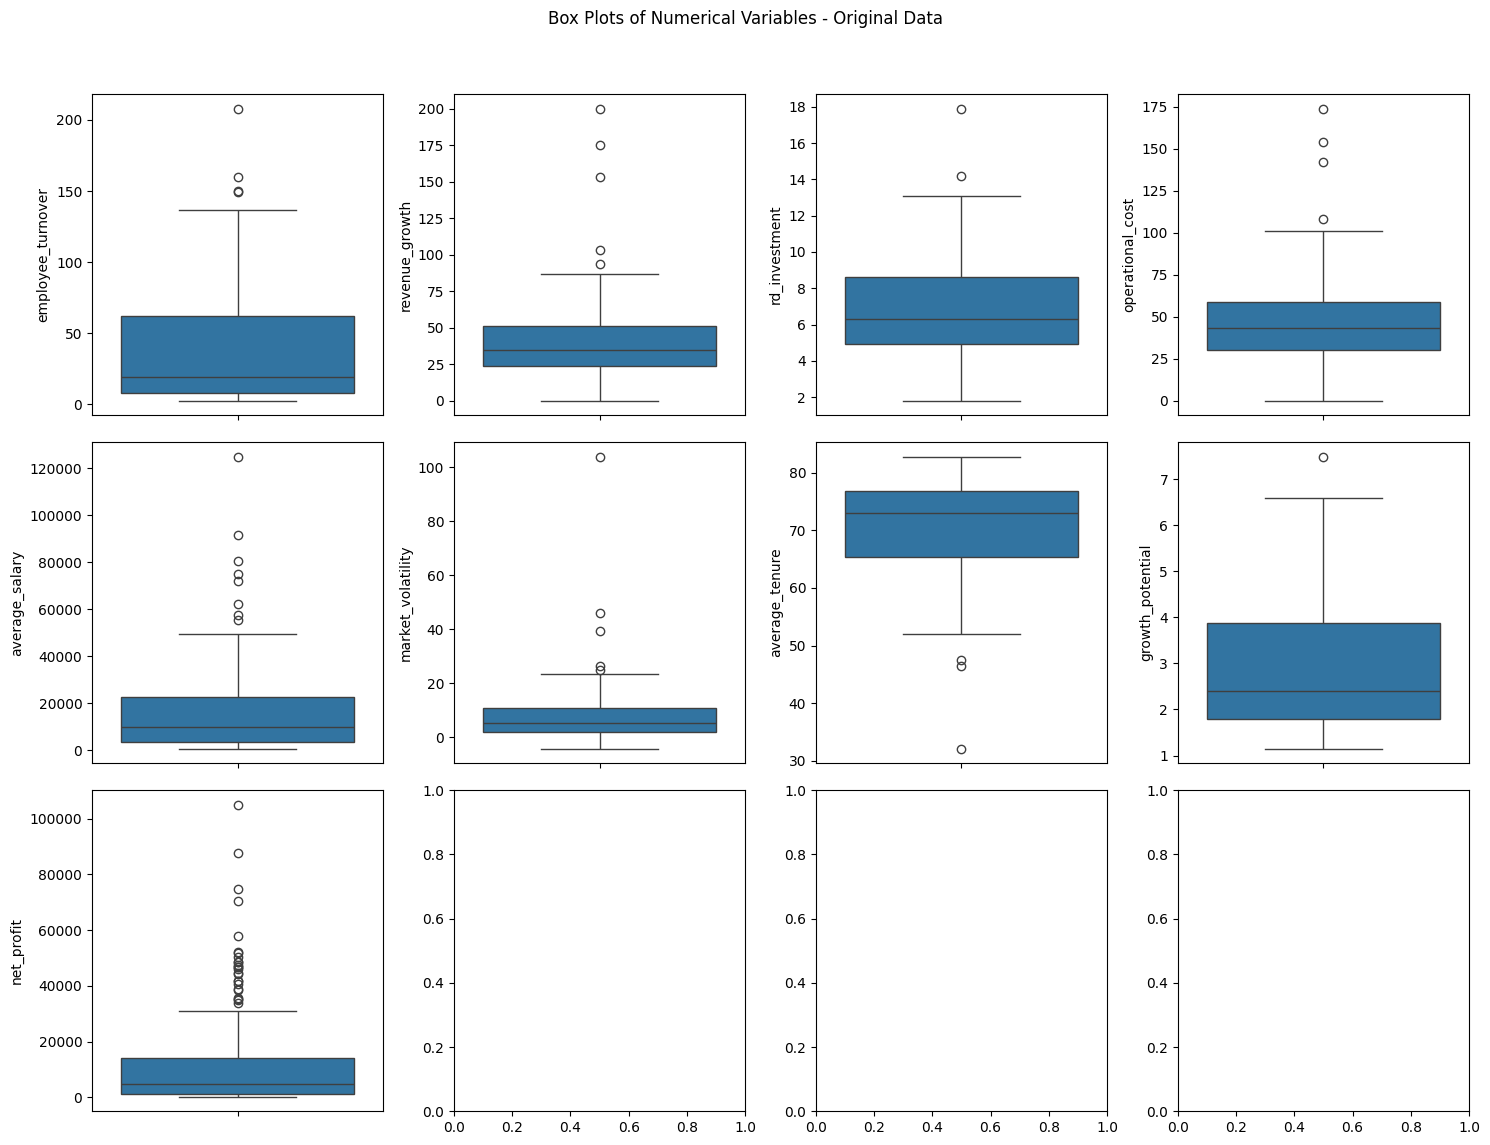

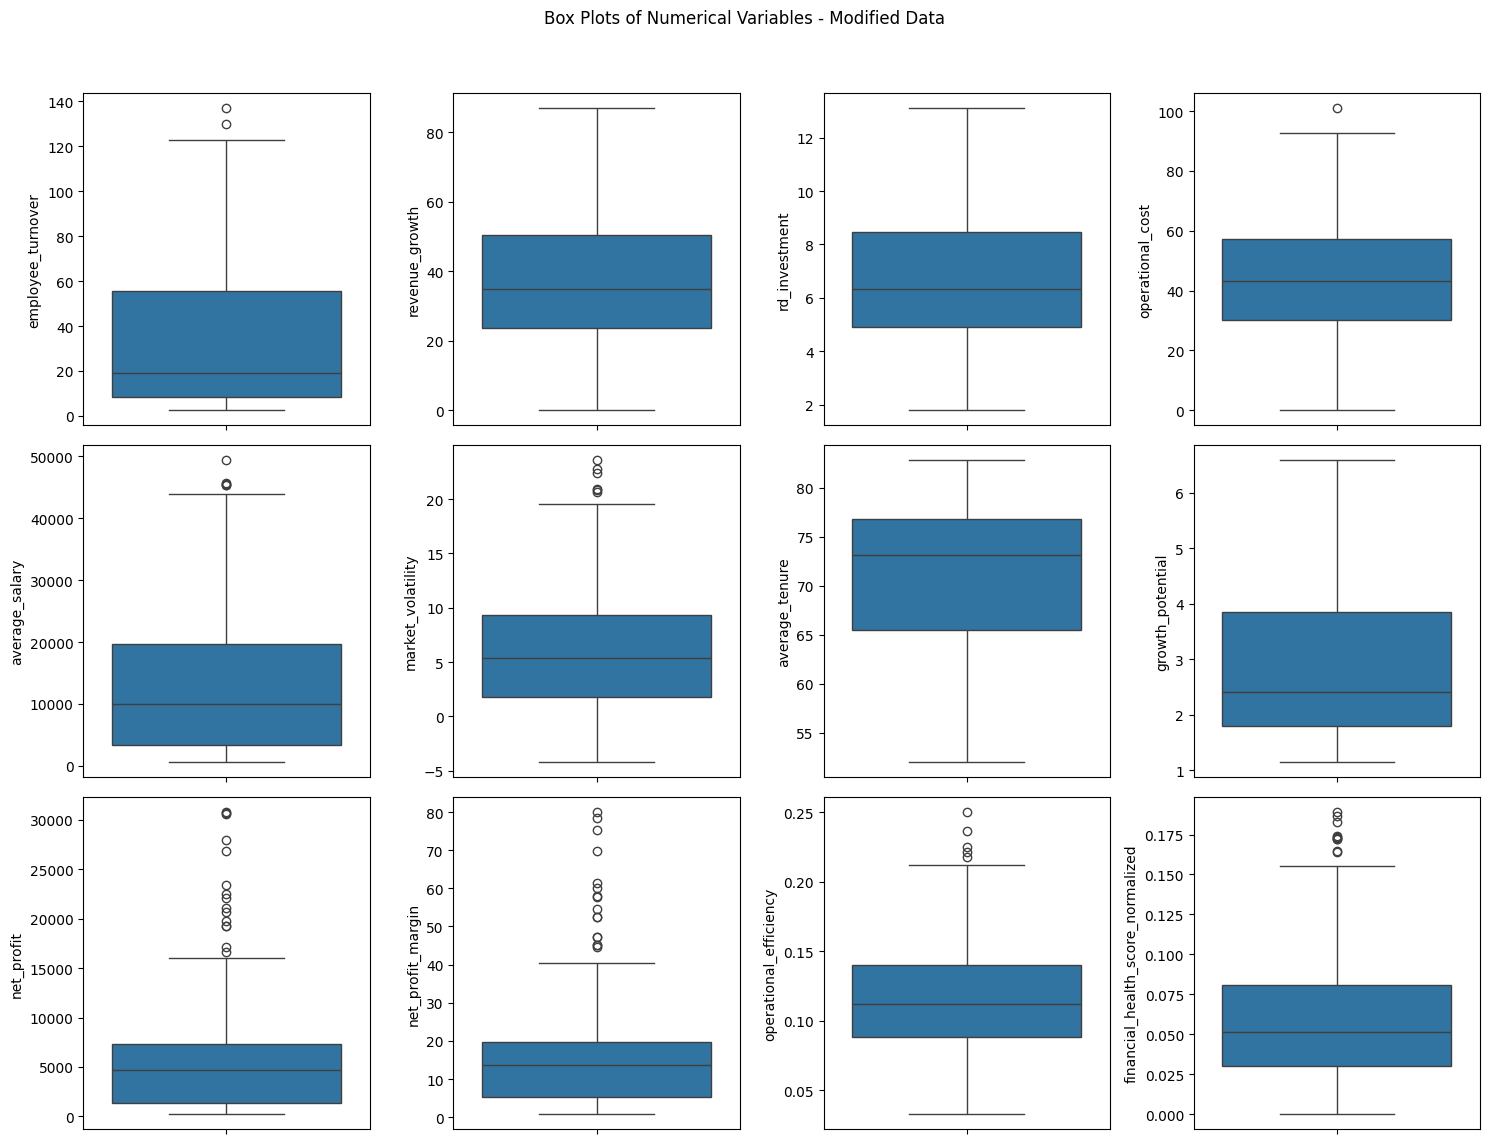

In [77]:
# Load the original dataset again
data_original = pd.read_csv("company_data.csv")
df_original = data_original.drop(columns=["Unnamed: 0", "company"])


# Calculating skewness for original and modified data
skewness_original = df_original.skew()
skewness_modified = df.skew()

# Plotting histograms and box plots for each numerical variable - before and after outlier removal
n_rows = 3
n_cols = 4

# Histograms - Original Data
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
fig.suptitle("Histogram Distribusi Numerical Variables - Original Data")

for i, column in enumerate(df_original.columns):
    sns.histplot(df_original[column], kde=True, ax=axes[i // n_cols, i % n_cols])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Histograms - Modified Data
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

fig.suptitle("Histogram Distribusi Numerical Variables - Modified Data")

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i // n_cols, i % n_cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Box Plots - Original Data
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
fig.suptitle("Box Plots of Numerical Variables - Original Data")

for i, column in enumerate(df_original.columns):
    sns.boxplot(y=df_original[column], ax=axes[i // n_cols, i % n_cols])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Box Plots - Modified Data
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
fig.suptitle("Box Plots of Numerical Variables - Modified Data")

for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i // n_cols, i % n_cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

(skewness_original, skewness_modified)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   employee_turnover                  167 non-null    float64
 1   revenue_growth                     167 non-null    float64
 2   rd_investment                      167 non-null    float64
 3   operational_cost                   167 non-null    float64
 4   average_salary                     167 non-null    float64
 5   market_volatility                  167 non-null    float64
 6   average_tenure                     167 non-null    float64
 7   growth_potential                   167 non-null    float64
 8   net_profit                         167 non-null    float64
 9   net_profit_margin                  167 non-null    float64
 10  operational_efficiency             167 non-null    float64
 11  financial_health_score_normalized  167 non-null    float64

In [79]:
# statistika deskriptif mengenai dataset kita
df.describe(include='all')

employee_turnover  revenue_growth  rd_investment  operational_cost  \
count         167.000000      167.000000     167.000000        167.000000   
mean           34.738323       37.816760       6.699162         44.466263   
std            34.794706       19.139999       2.542794         18.359522   
min             2.600000        0.109000       1.810000          0.065900   
25%             8.250000       23.800000       4.920000         30.200000   
50%            19.300000       35.000000       6.320000         43.300000   
75%            55.600000       50.500000       8.455000         57.400000   
max           137.000000       86.900000      13.100000        101.000000   

       average_salary  market_volatility  average_tenure  growth_potential  \
count      167.000000          167.00000      167.000000        167.000000   
mean     13909.239521            6.50309       71.113772          2.917545   
std      12894.978402            5.99342        7.955834          1.472504   
min        609.000000           -4.21000       52.000000          1.150000   
25%       3355.000000            1.81000       65.500000          1.795000   
50%       9960.000000            5.39000       73.100000          2.410000   
75%      19750.000000            9.34500       76.800000          3.845000   
max      49400.000000           23.60000       82.800000          6.590000   

         net_profit  net_profit_margin  operational_efficiency  \
count    167.000000         167.000000              167.000000   
mean    6089.305389          16.740764                0.116401   
std     6580.330483          16.505696                0.040203   
min      231.000000           0.812652                0.032756   
25%     1330.000000           5.329706                0.088214   
50%     4660.000000          13.625498                0.111950   
75%     7325.000000          19.685408                0.139982   
max    30800.000000          80.000000                0.250000   

       financial_health_score_normalized  
count                         167.000000  
mean                            0.061904  
std                             0.045790  
min                             0.000000  
25%                             0.030104  
50%                             0.051326  
75%                             0.081019  
max                             0.189040

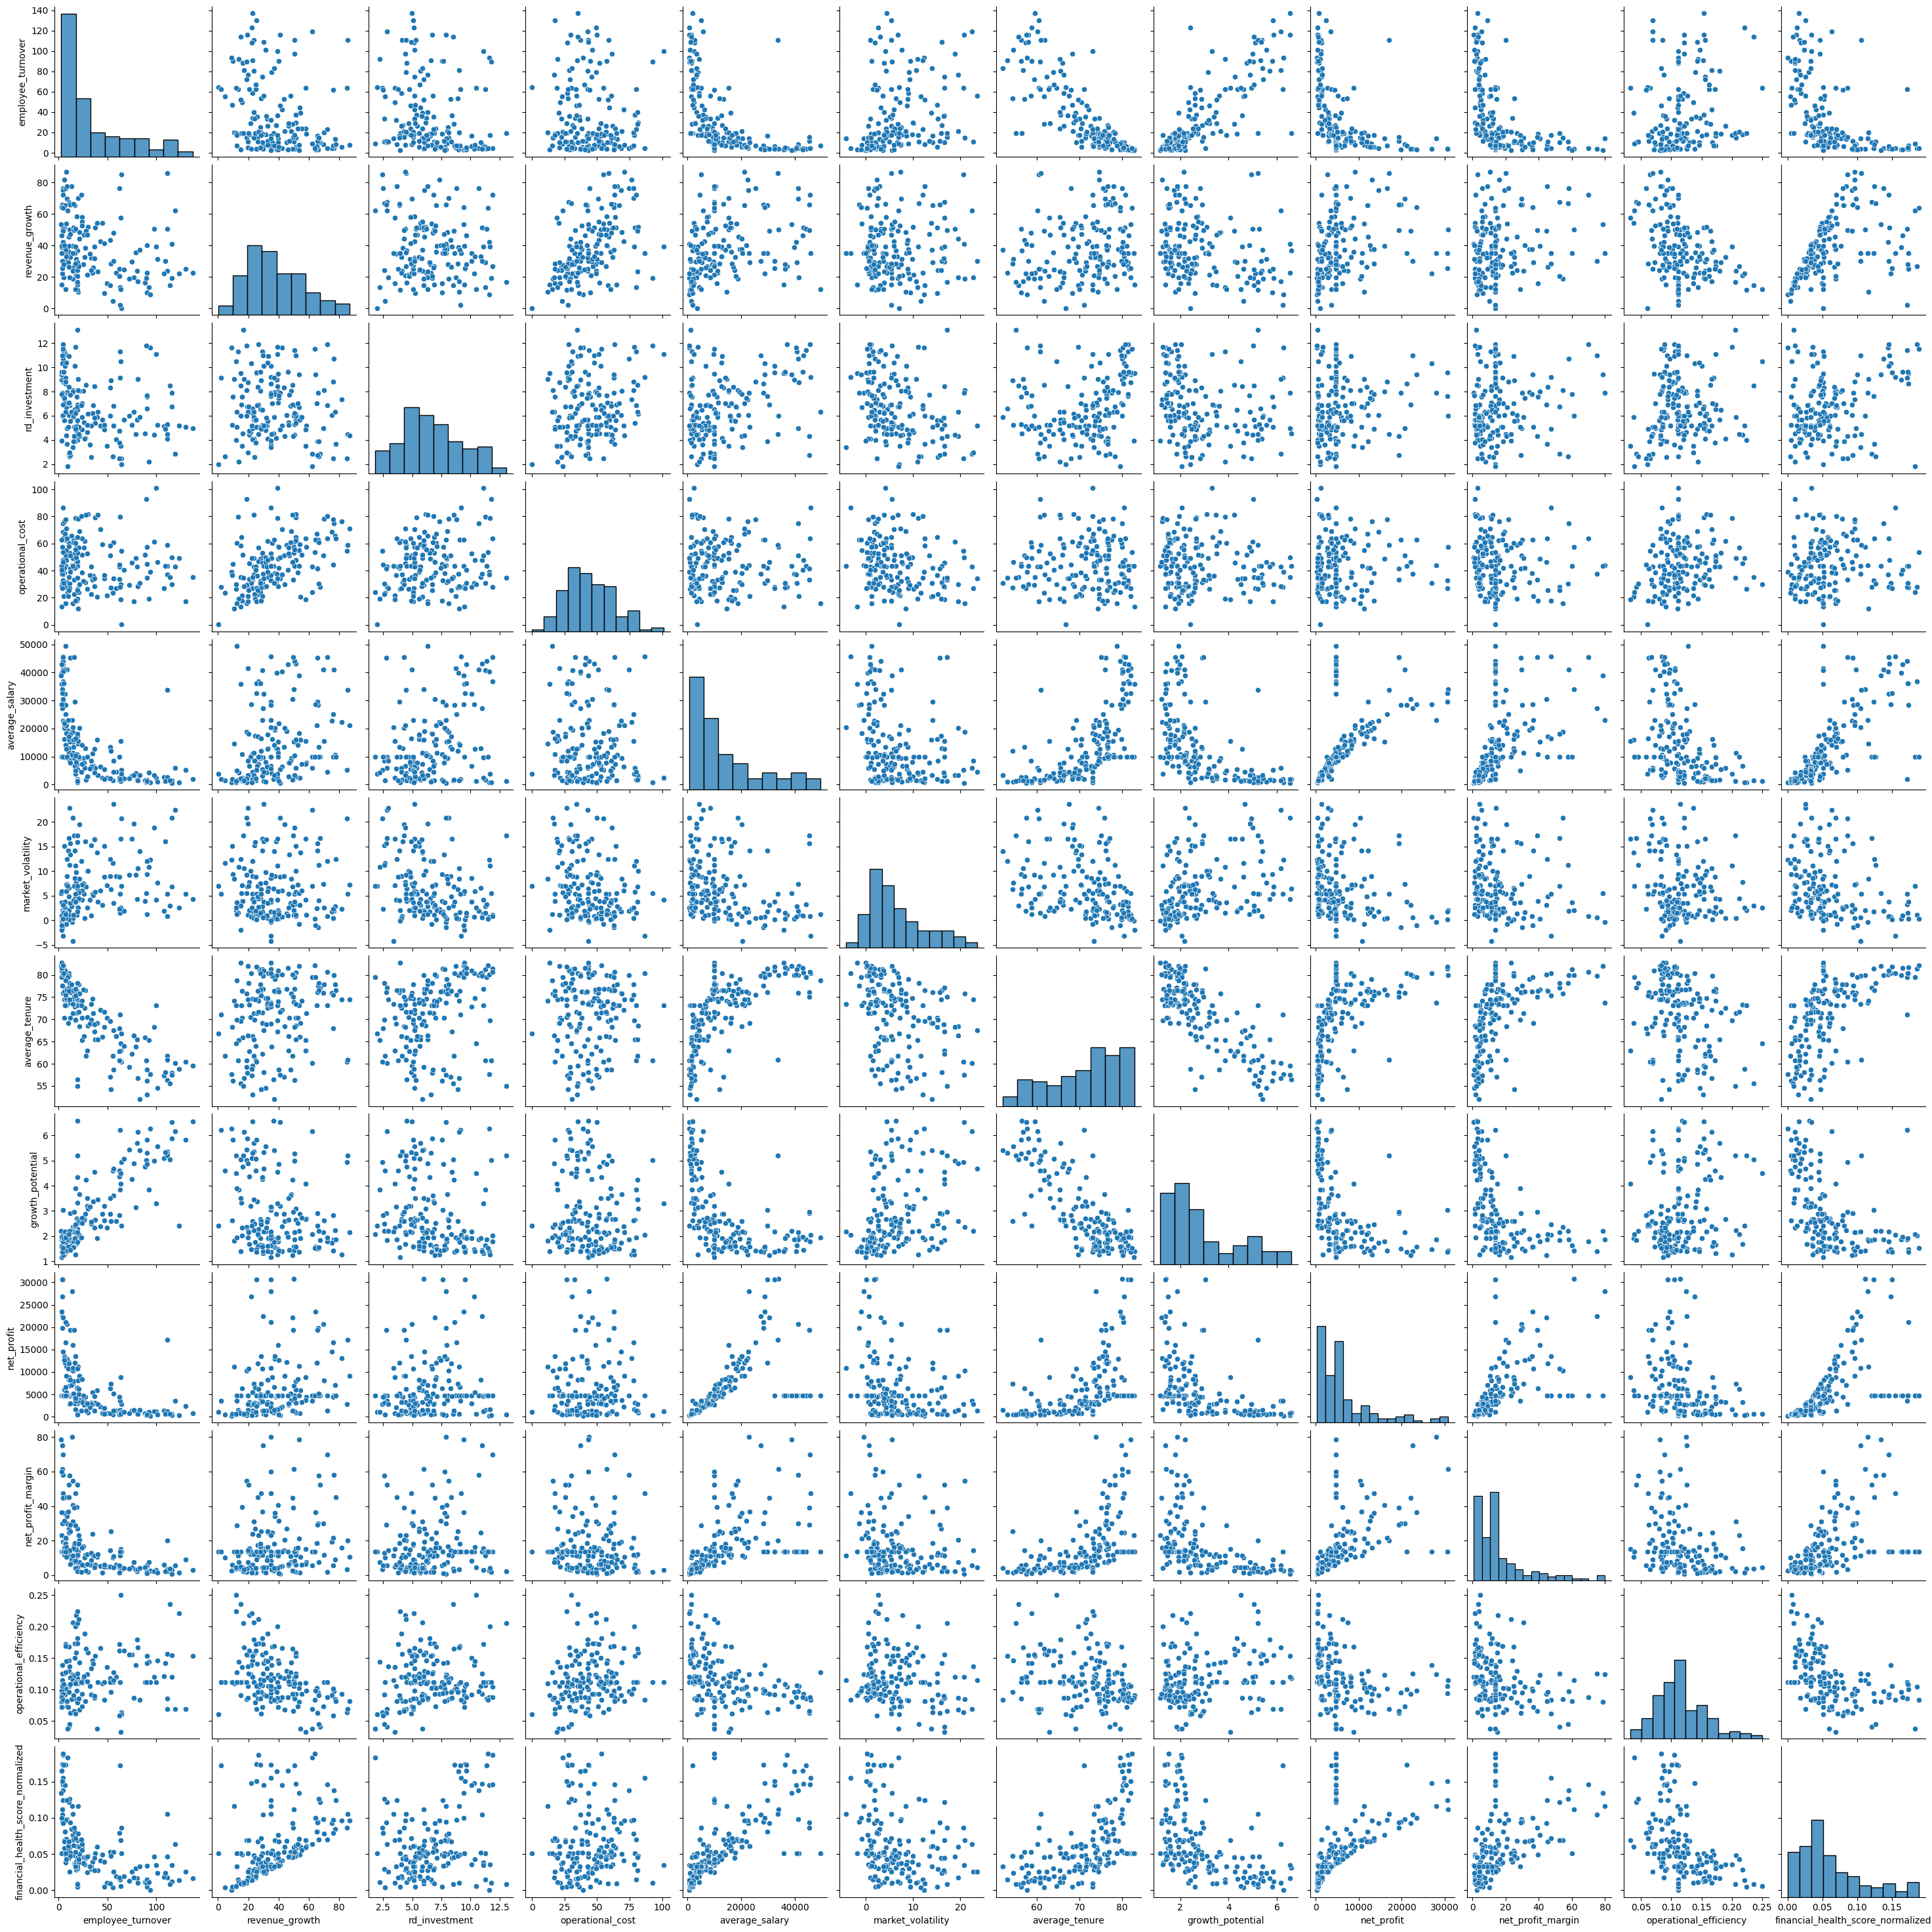

In [80]:
sns.pairplot(df)
plt.show()

Terdapat beberapa fitur yang memiliki korelasi cukup kuat, diantaranya:

Korelasi Positif:
- average_salary vs revenue_growth ➔ Korelasi positif.
Artinya perusahaan dengan gaji rata-rata tinggi cenderung menghasilkan revenue lebih besar.
- employees_turnover vs revenue_growth ➔ Korelasi positif juga.
Artinya makin banyak pegawai, makin besar revenue (masuk akal untuk data perusahaan).

Korelasi Negatif:
- average_salary vs employees_turnover ➔ Sepertinya sedikit korelasi negatif (semakin besar perusahaan, tenure rata-rata mungkin malah sedikit berkurang).


Kita tinjau distribusi dari predicted variable kita dimana dalam hal ini adalah **Semua Fitur**

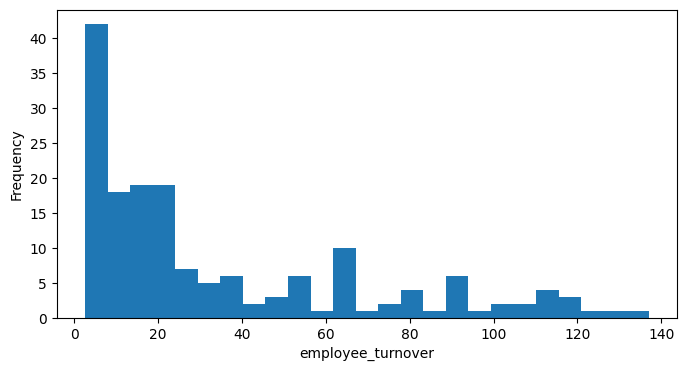

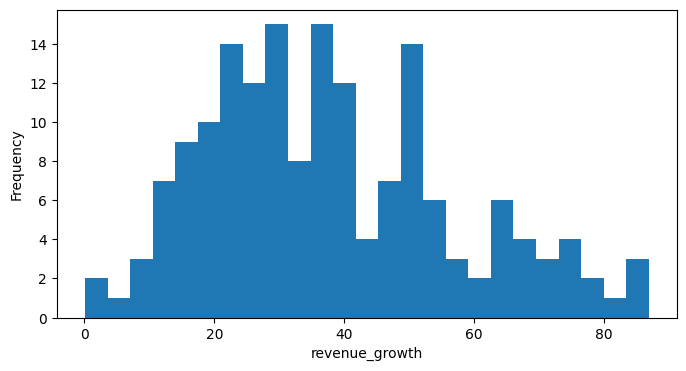

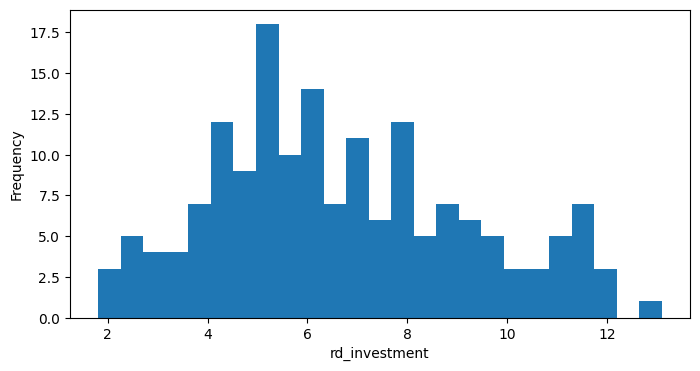

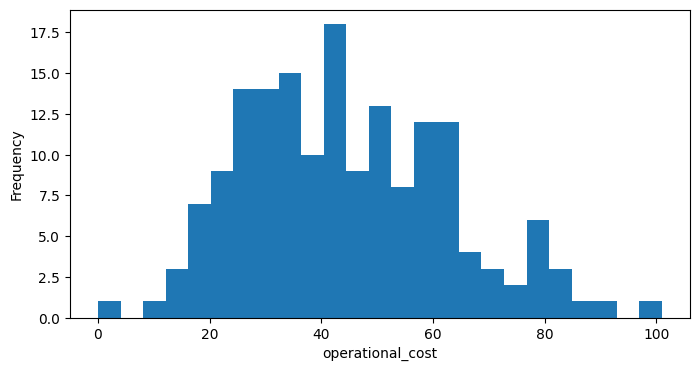

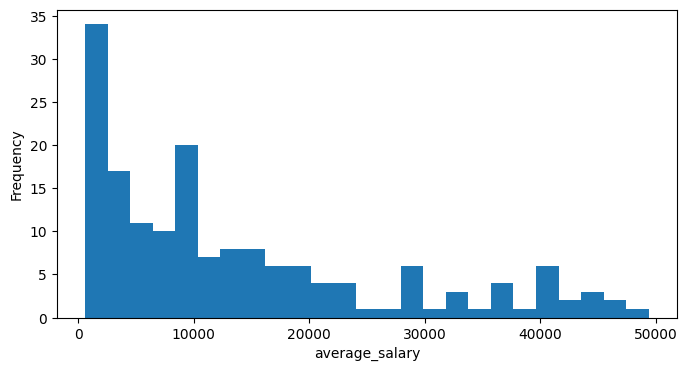

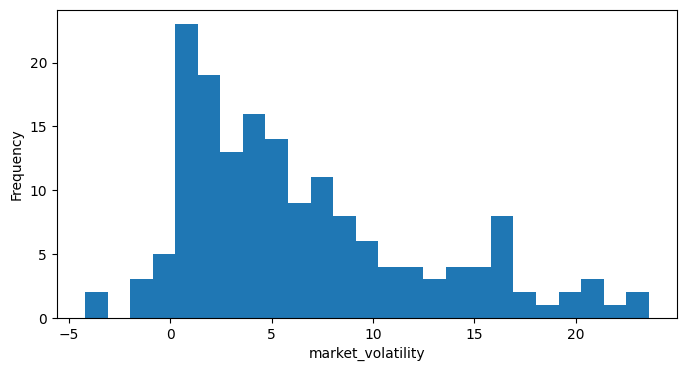

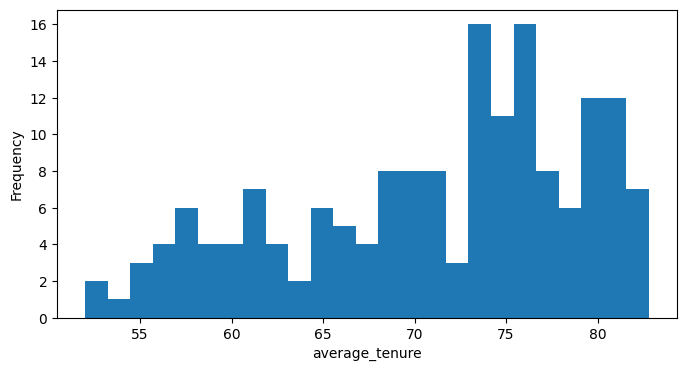

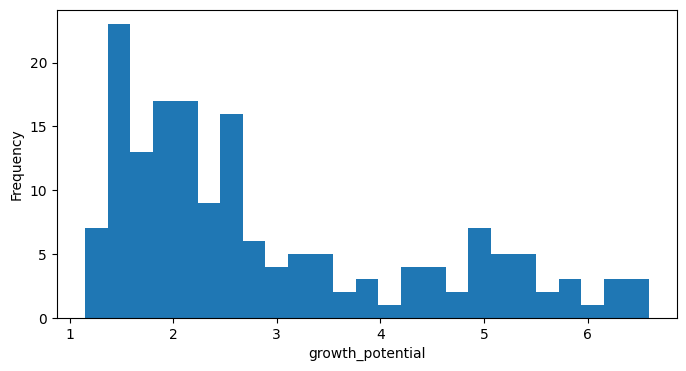

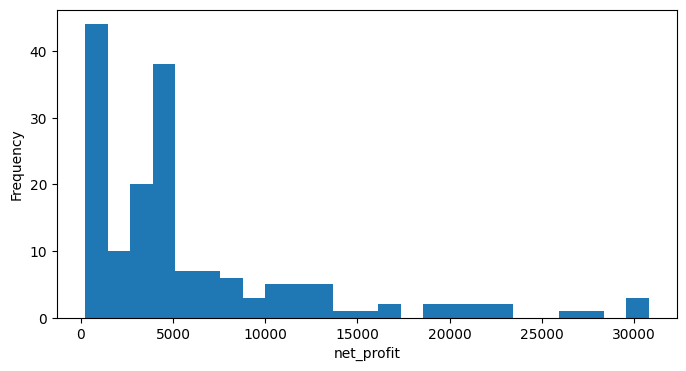

In [81]:
columns = ['employee_turnover', 'revenue_growth', 'rd_investment', 'operational_cost',
           'average_salary', 'market_volatility', 'average_tenure', 'growth_potential', 'net_profit']

for col in columns:
    df[col].plot.hist(bins=25, figsize=(8,4))
    plt.xlabel(col)
    plt.show()

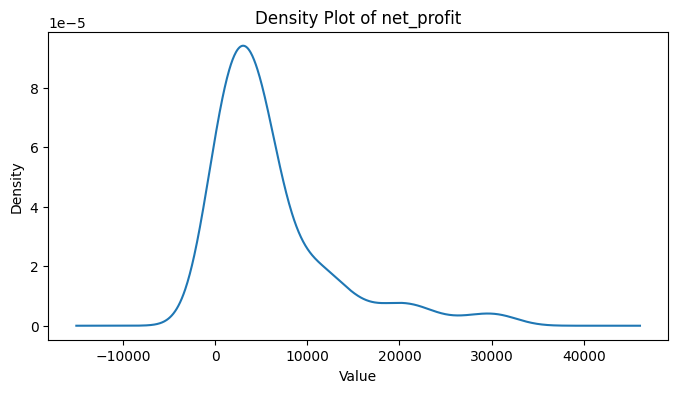

In [82]:
columns = ['employee_turnover', 'revenue_growth', 'rd_investment', 'operational_cost',
           'average_salary', 'market_volatility', 'average_tenure', 'growth_potential', 'net_profit']

df[col].plot.density(figsize=(8, 4))
plt.title(f"Density Plot of {col}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


#df['employee_turnover'].plot.density()

<Axes: ylabel='Density'>

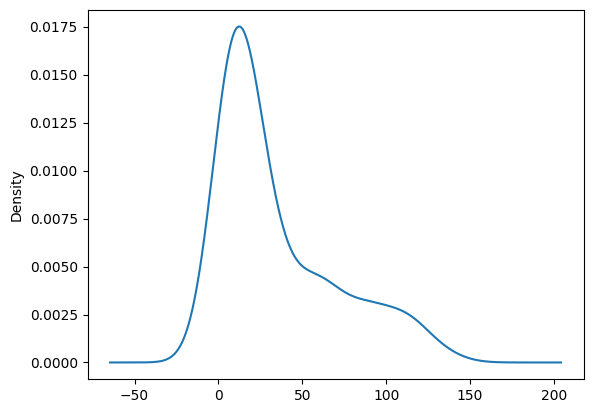

In [83]:
df['employee_turnover'].plot.density()

<Axes: ylabel='Density'>

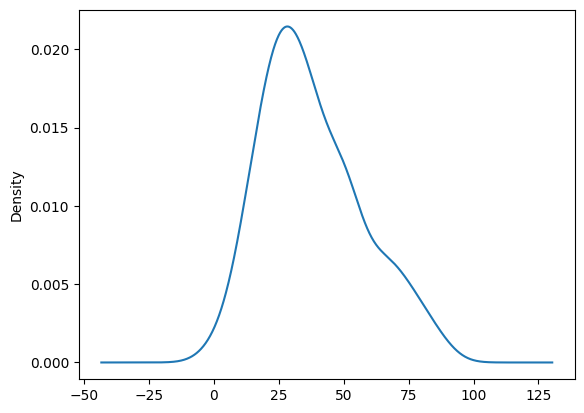

In [84]:
df['revenue_growth'].plot.density()

Kemudian kita tinjau pula korelasi antar variabel menggunakan correlation heatmap

Disini kita akan drop kolom company dan kita akan mempersiapkan dataset untuk training dengan cara memisahkan prediktor dan target variabel

In [85]:
df.head()

employee_turnover  revenue_growth  rd_investment  operational_cost  \
0               90.2            10.0           7.58              44.9   
1               16.6            28.0           6.55              48.6   
2               27.3            38.4           4.17              31.4   
3              119.0            62.3           2.85              42.9   
4               10.3            45.5           6.03              58.9   

   average_salary  market_volatility  average_tenure  growth_potential  \
0          1610.0               9.44            56.2              5.82   
1          9930.0               4.49            76.3              1.65   
2         12900.0              16.10            76.5              2.89   
3          5900.0              22.40            60.1              6.16   
4         19100.0               1.44            76.8              2.13   

   net_profit  net_profit_margin  operational_efficiency  \
0       553.0           5.530000                0.111950   
1      4090.0          14.607143                0.173571   
2      4460.0          11.614583                0.081771   
3      3530.0           5.666132                0.068860   
4     12200.0          26.813187                0.129451   

   financial_health_score_normalized  
0                           0.004486  
1                           0.034886  
2                           0.043212  
3                           0.063272  
4                           0.068094

melihat korelasi antar fitur

In [86]:
df.corr()

employee_turnover  revenue_growth  \
employee_turnover                           1.000000       -0.266019   
revenue_growth                             -0.266019        1.000000   
rd_investment                              -0.248137       -0.106738   
operational_cost                           -0.069895        0.499862   
average_salary                             -0.581020        0.312480   
market_volatility                           0.288367       -0.012607   
average_tenure                             -0.822961        0.227821   
growth_potential                            0.822130       -0.288496   
net_profit                                 -0.464390        0.292779   
net_profit_margin                          -0.486285        0.189809   
operational_efficiency                      0.211273       -0.446307   
financial_health_score_normalized          -0.522978        0.455321   

                                   rd_investment  operational_cost  \
employee_turnover                      -0.248137         -0.069895   
revenue_growth                         -0.106738          0.499862   
rd_investment                           1.000000          0.180353   
operational_cost                        0.180353          1.000000   
average_salary                          0.337703         -0.059935   
market_volatility                      -0.338221         -0.242609   
average_tenure                          0.255132         -0.003840   
growth_potential                       -0.193367         -0.089124   
net_profit                              0.127770         -0.004393   
net_profit_margin                       0.142508         -0.066137   
operational_efficiency                  0.132439          0.175188   
financial_health_score_normalized       0.298307          0.030122   

                                   average_salary  market_volatility  \
employee_turnover                       -0.581020           0.288367   
revenue_growth                           0.312480          -0.012607   
rd_investment                            0.337703          -0.338221   
operational_cost                        -0.059935          -0.242609   
average_salary                           1.000000          -0.302784   
market_volatility                       -0.302784           1.000000   
average_tenure                           0.662620          -0.359041   
growth_potential                        -0.554945           0.336604   
net_profit                               0.588615          -0.246548   
net_profit_margin                        0.511011          -0.154456   
operational_efficiency                  -0.394194          -0.189033   
financial_health_score_normalized        0.724862          -0.293174   

                                   average_tenure  growth_potential  \
employee_turnover                       -0.822961          0.822130   
revenue_growth                           0.227821         -0.288496   
rd_investment                            0.255132         -0.193367   
operational_cost                        -0.003840         -0.089124   
average_salary                           0.662620         -0.554945   
market_volatility                       -0.359041          0.336604   
average_tenure                           1.000000         -0.799585   
growth_potential                        -0.799585          1.000000   
net_profit                               0.479460         -0.463186   
net_profit_margin                        0.515502         -0.468014   
operational_efficiency                  -0.287838          0.222645   
financial_health_score_normalized        0.621716         -0.481975   

                                   net_profit  net_profit_margin  \
employee_turnover                   -0.464390          -0.486285   
revenue_growth                       0.292779           0.189809   
rd_investment                        0.127770           0.142508   
operational_cost                    -0.004393         

<Axes: >

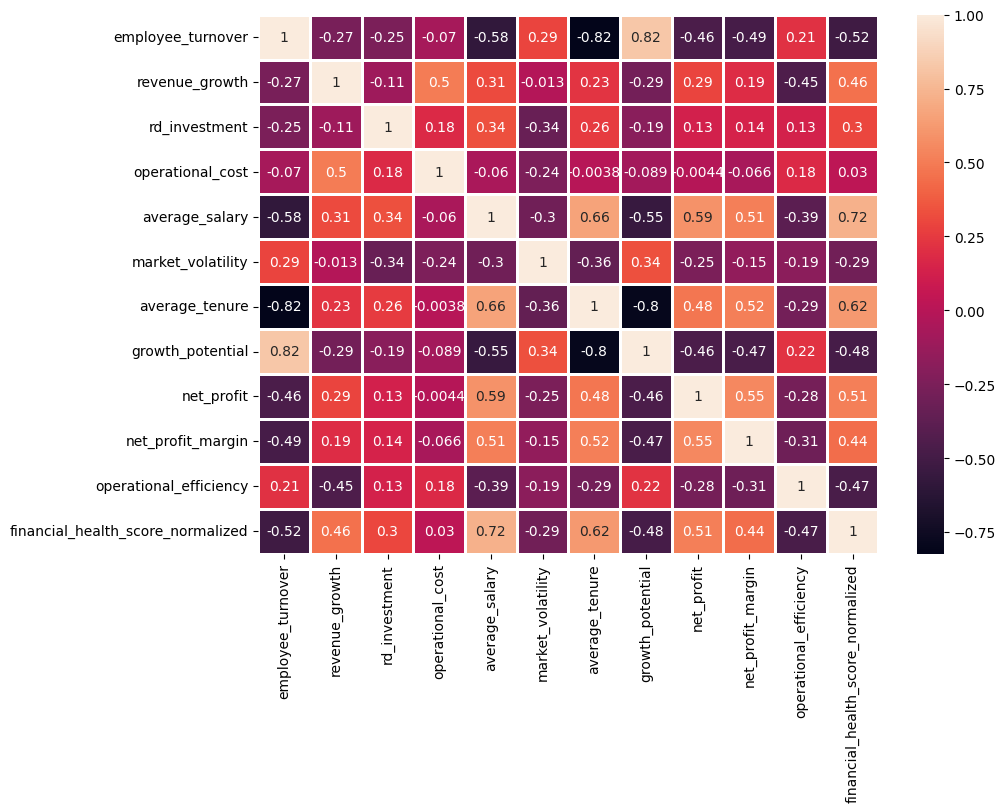

In [87]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

- Ada korelasi negatif yang kuat antara employee_turnover dan average_tenure (-0.89), yang masuk akal karena tingkat turnover yang lebih tinggi cenderung berarti masa kerja yang lebih pendek.
- revenue_growth berkorelasi positif dengan operational_cost (0.74), menunjukkan bahwa perusahaan dengan pertumbuhan pendapatan yang lebih tinggi cenderung memiliki biaya operasional yang lebih tinggi.
- average_salary berkorelasi sangat kuat dengan net_profit (0.90), menandakan perusahaan dengan gaji rata-rata yang lebih tinggi cenderung memiliki laba bersih yang lebih besar.
- growth_potential berkorelasi negatif dengan average_tenure (-0.76), menunjukkan bahwa perusahaan dengan potensi pertumbuhan yang lebih tinggi mungkin mengalami turnover karyawan yang lebih tinggi.

Feature Engineering

In [88]:
len(df) #mengecek panjang baris dari df

167

In [89]:
len(df) - len(df.drop_duplicates()) #mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat

0

In [90]:
len(df.drop_duplicates()) #mengecek panjang baris ketika sudah diperlakukan drop duplikat

167

In [91]:
len(df.drop_duplicates()) / len(df) #jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

In [92]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom, nanti hanya pilih 1 saja, karena yang duplikat hanya 44 baris
duplicates = df[df.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


Empty DataFrame
Columns: [employee_turnover, revenue_growth, rd_investment, operational_cost, average_salary, market_volatility, average_tenure, growth_potential, net_profit, net_profit_margin, operational_efficiency, financial_health_score_normalized]
Index: []

In [93]:
df = df.drop_duplicates() #drop duplikat

In [94]:
#mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat
len(df) - len(df.drop_duplicates())

0

In [95]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

DROP DUPLIKAT Selesai

Outlier Handling, InterQuartile Handling

In [96]:
df_companydata = pd.read_csv('company_data.csv')
df_companydata.head()

Unnamed: 0    company  employee_turnover  revenue_growth  rd_investment  \
0           0  Company_1               90.2            10.0           7.58   
1           1  Company_2               16.6            28.0           6.55   
2           2  Company_3               27.3            38.4           4.17   
3           3  Company_4              119.0            62.3           2.85   
4           4  Company_5               10.3            45.5           6.03   

   operational_cost  average_salary  market_volatility  average_tenure  \
0              44.9            1610               9.44            56.2   
1              48.6            9930               4.49            76.3   
2              31.4           12900              16.10            76.5   
3              42.9            5900              22.40            60.1   
4              58.9           19100               1.44            76.8   

   growth_potential  net_profit  
0              5.82         553  
1              1.65        4090  
2              2.89        4460  
3              6.16        3530  
4              2.13       12200

In [97]:
columns = list(df.columns)

# ambil kolom prediktor dan simpan di variable predictor
predictor = columns[:-1]

# ambil kolom target dan simpan di variable target
target = columns[-1]

In [98]:
df[predictor]

employee_turnover  revenue_growth  rd_investment  operational_cost  \
0                 90.2            10.0           7.58              44.9   
1                 16.6            28.0           6.55              48.6   
2                 27.3            38.4           4.17              31.4   
3                119.0            62.3           2.85              42.9   
4                 10.3            45.5           6.03              58.9   
..                 ...             ...            ...               ...   
162               29.2            46.6           5.25              52.7   
163               17.1            28.5           4.91              17.6   
164               23.3            72.0           6.84              80.2   
165               56.3            30.0           5.18              34.4   
166               83.1            37.0           5.89              30.9   

     average_salary  market_volatility  average_tenure  growth_potential  \
0            1610.0               9.44            56.2              5.82   
1            9930.0               4.49            76.3              1.65   
2           12900.0              16.10            76.5              2.89   
3            5900.0              22.40            60.1              6.16   
4           19100.0               1.44            76.8              2.13   
..              ...                ...             ...               ...   
162          2950.0               2.62            63.0              3.50   
163         16500.0               5.39            75.4              2.47   
164          4490.0              12.10            73.1              1.95   
165          4480.0              23.60            67.5              4.67   
166          3280.0              14.00            52.0              5.40   

     net_profit  net_profit_margin  operational_efficiency  
0         553.0           5.530000                0.111950  
1        4090.0          14.607143                0.173571  
2        4460.0          11.614583                0.081771  
3        3530.0           5.666132                0.068860  
4       12200.0          26.813187                0.129451  
..          ...                ...                     ...  
162      2970.0           6.373391                0.113090  
163     13500.0          47.368421                0.061754  
164      1310.0           1.819444                0.111389  
165      1310.0           4.366667                0.114667  
166      1460.0           3.945946                0.083514  

[167 rows x 11 columns]

In [99]:
df[target]

0      0.004486
1      0.034886
2      0.043212
3      0.063272
4      0.068094
         ...   
162    0.046500
163    0.072103
164    0.069787
165    0.025714
166    0.033081
Name: financial_health_score_normalized, Length: 167, dtype: float64

In [100]:
X = df[predictor] #independent variable

In [101]:
y = df[target] #dependent variable

Kemudian kita akan melakukan split train-test

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("Train size :", X_train)
print("Test size :", X_test)

Train size :      employee_turnover  revenue_growth  rd_investment  operational_cost  \
0                 90.2           10.00           7.58              44.9   
82                10.8           66.70           2.63              30.4   
59                74.7           29.50           5.22              45.9   
95                 7.9           86.90           4.39              71.0   
60                 3.9           22.10          10.30              30.7   
..                 ...             ...            ...               ...   
17               111.0           23.80           4.10              37.2   
98                 6.8           35.00           8.65              43.3   
66                19.3           15.30           6.91              64.7   
126               63.6           12.00          10.50              30.0   
109               47.0            9.58           5.25              36.4   

     average_salary  market_volatility  average_tenure  growth_potential  \
0         

In [103]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [104]:
employee_turnover_upper_limit, employee_turnover_lower_limit = find_outlier_boundary(X_train, 'employee_turnover')
employee_turnover_upper_limit, employee_turnover_lower_limit

(np.float64(133.47499999999997), np.float64(-63.524999999999984))

Upper Limit (133.474) → Nilai di atas ini dianggap sebagai outlier.qqqq---

Lower Limit (-_--6- -) → Nilai di bawah ini juga dianggap sebagai outlier.

In [105]:
# Sekarang mari kita ganti outlier dengan batas maksimum dan minimum

X_train['employee_turnover'] = np.where(
    X_train['employee_turnover'] > employee_turnover_upper_limit, employee_turnover_upper_limit,  # Jika lebih besar dari batas atas, ganti dengan batas atas
    np.where(
        X_train['employee_turnover'] < employee_turnover_lower_limit, employee_turnover_lower_limit,  # Jika lebih kecil dari batas bawah, ganti dengan batas bawah
        X_train['employee_turnover']  # Jika tidak outlier, biarkan tetap sama
    )
)

In [106]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # Periksa apakah kolom berisi data numerik
    if pd.api.types.is_numeric_dtype(df[variable]):
        # tentukan ukuran gambar
        plt.figure(figsize=(16, 4))

        # histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[variable], bins=30)
        plt.title('Histogram')

        # plot Q-Q
        plt.subplot(1, 3, 2)
        stats.probplot(df[variable], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

        # box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=df[variable])
        plt.title('Boxplot')

        plt.show()
    else:
        print(f"Kolom '{variable}' tidak berisi data numerik dan tidak dapat diplot.") # Menampilkan pesan jika kolom tidak numerik

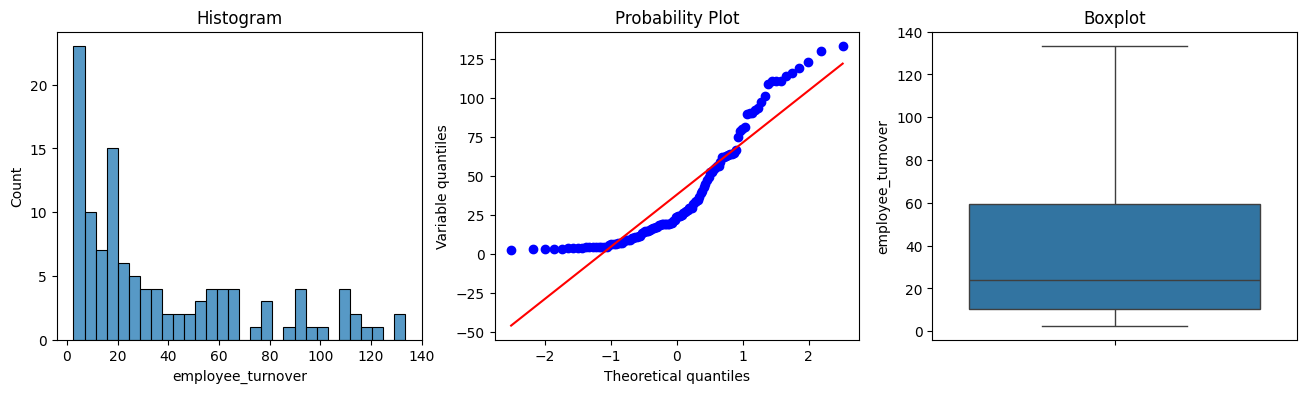

In [107]:
# memvisualisasikan outlier
check_plot(X_train, 'employee_turnover')

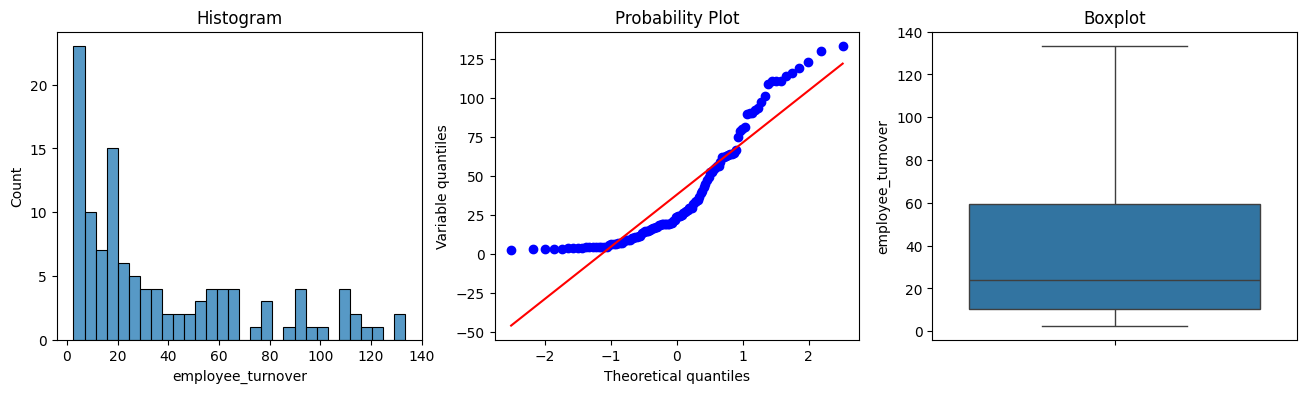

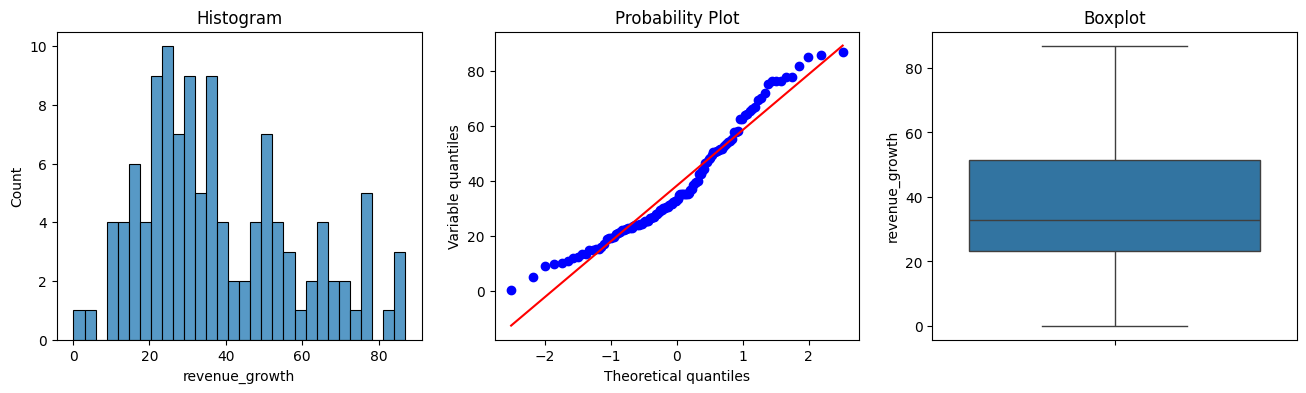

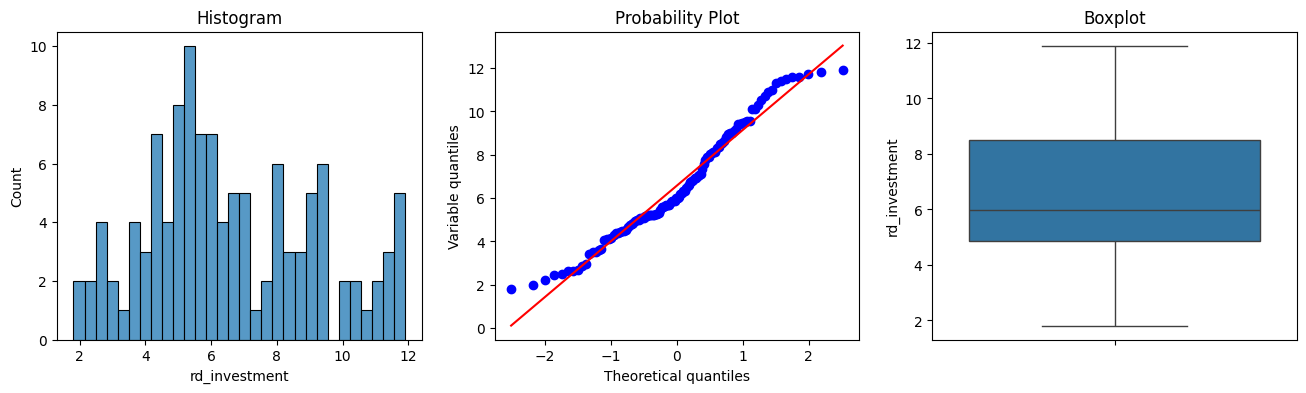

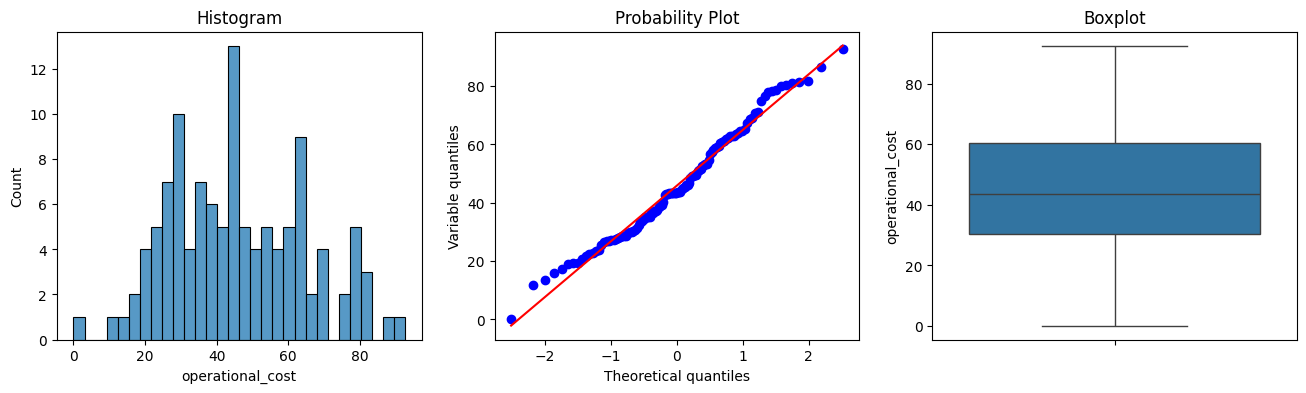

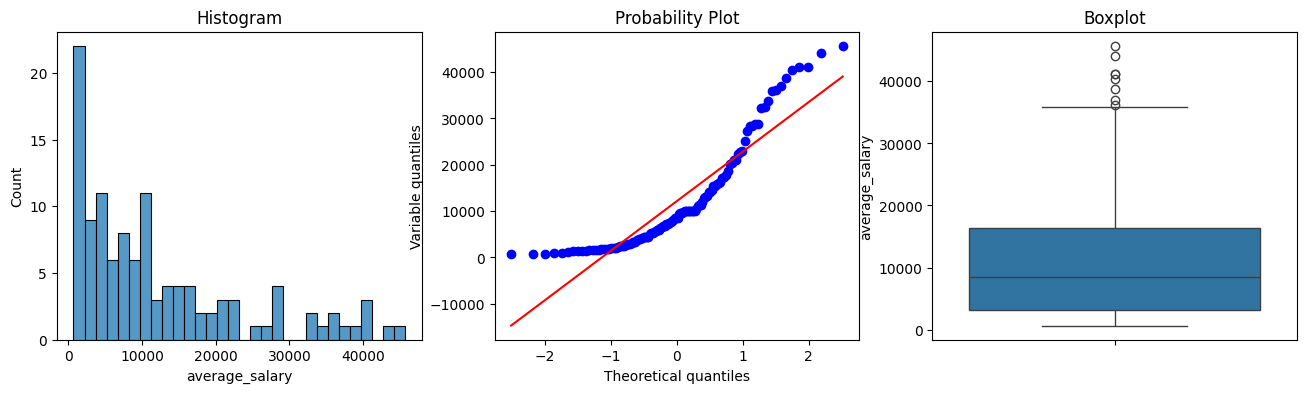

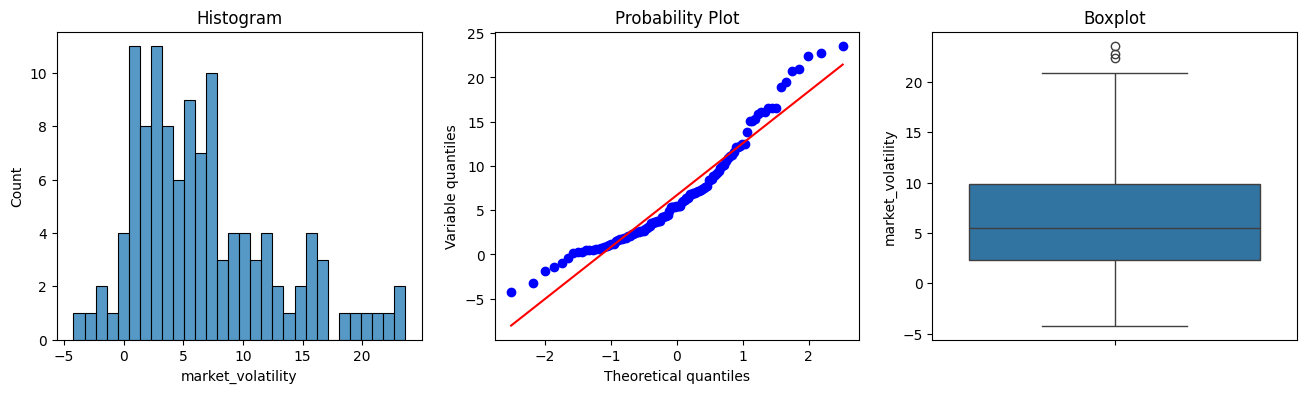

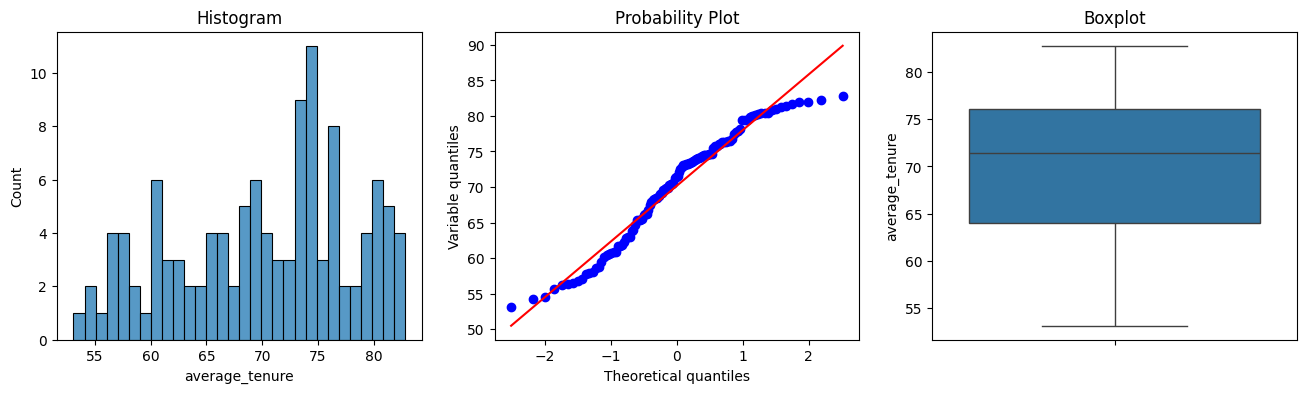

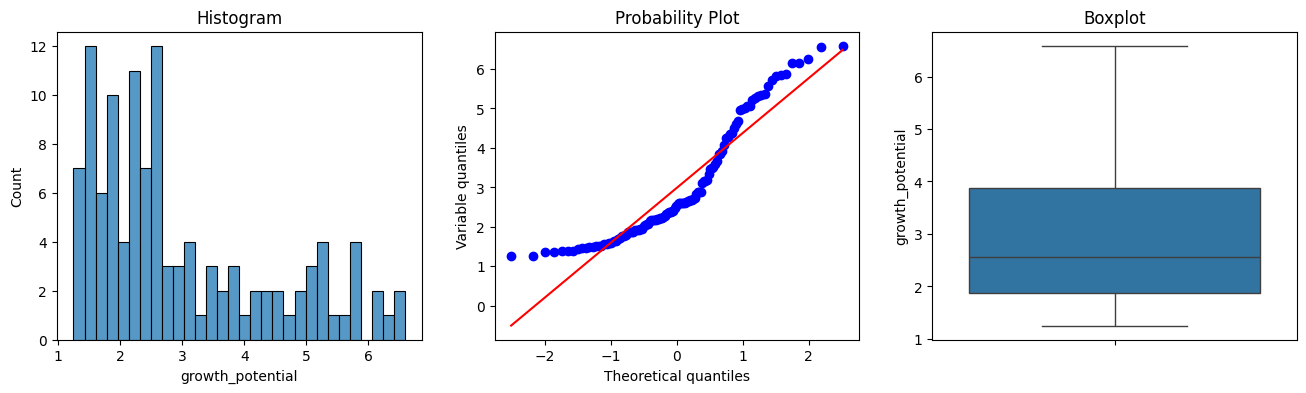

In [108]:
check_plot(X_train, 'employee_turnover')
check_plot(X_train, 'revenue_growth')
check_plot(X_train, 'rd_investment')
check_plot(X_train, 'operational_cost')
check_plot(X_train, 'average_salary')
check_plot(X_train, 'market_volatility')
check_plot(X_train, 'average_tenure')
check_plot(X_train, 'growth_potential')

Outlier Handling : Bussines Perspective

In [109]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.8 MB/s eta 0:00:00


In [110]:
from feature_engine.outliers import ArbitraryOutlierCapper

In [111]:
X_train.employee_turnover.describe()

count    116.000000
mean      37.920474
std       35.703391
min        2.600000
25%       10.350000
50%       23.700000
75%       59.600000
max      133.475000
Name: employee_turnover, dtype: float64

In [112]:
teknik_capper = ArbitraryOutlierCapper(max_capping_dict={'employee_turnover': 208.000000},
                                       min_capping_dict={'employee_turnover': 2.600000})

teknik_capper.fit(X_train.fillna(0))
#Dokumentasi : https://feature-engine.trainindata.com/en/1.1.x/outliers/ArbitraryOutlierCapper.html
#asumsikan sudah dilakukan handling missing value dengan teknik sementara yaitu memasukkan nilai 0,
#(nanti nilainya bisa disesuaikan menggunakan median misalnya karena numerikal)
#jika tidak demikian maka .fit akan error karena ada NaN atau nilai null lainnya

ArbitraryOutlierCapper(max_capping_dict={'employee_turnover': 208.0},
                       min_capping_dict={'employee_turnover': 2.6})

In [113]:
temp_company = teknik_capper.transform(X_train.fillna(0))

In [114]:
temp_company.employee_turnover.describe()

count    116.000000
mean      37.920474
std       35.703391
min        2.600000
25%       10.350000
50%       23.700000
75%       59.600000
max      133.475000
Name: employee_turnover, dtype: float64

Missing Value Handling

In [115]:
df.isna().sum()

employee_turnover                    0
revenue_growth                       0
rd_investment                        0
operational_cost                     0
average_salary                       0
market_volatility                    0
average_tenure                       0
growth_potential                     0
net_profit                           0
net_profit_margin                    0
operational_efficiency               0
financial_health_score_normalized    0
dtype: int64

In [116]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= employee_turnover =================


employee_turnover
19.3     5
4.5      4
111.0    3
24.1     3
4.2      3
        ..
29.2     1
17.1     1
23.3     1
56.3     1
83.1     1
Name: count, Length: 135, dtype: int64


============= revenue_growth =================


revenue_growth
35.0    8
23.8    3
76.3    2
12.4    2
30.3    2
       ..
28.2    1
31.7    1
46.6    1
28.5    1
30.0    1
Name: count, Length: 142, dtype: int64


============= rd_investment =================


rd_investment
5.20     3
6.32     3
5.07     3
11.00    2
6.03     2
        ..
5.81     1
4.91     1
6.84     1
5.18     1
5.89     1
Name: count, Length: 145, dtype: int64


============= operational_cost =================


operational_cost
43.3    6
57.5    2
58.9    2
42.1    2
19.4    2
       ..
52.7    1
17.6    1
80.2    1
34.4    1
30.9    1
Name: count, Length: 147, dtype: int64


============= average_salary =================


average_salary
9960.0     9
15300.0    2
20100.0    2
41100.0    2
15400.0    2
          ..
2950.0     1
16500.0    1
4490.0     1
4480.0     1
3280.0     1
Name: count, Length: 148, dtype: int64


============= market_volatility =================


market_volatility
5.39     6
16.60    3
16.10    2
2.01     2
6.81     2
        ..
4.91     1
16.50    1
2.62     1
23.60    1
14.00    1
Name: count, Length: 151, dtype: int64


============= average_tenure =================


average_tenure
73.1    5
76.3    3
76.4    3
70.4    3
80.4    3
       ..
68.8    1
63.0    1
75.4    1
67.5    1
52.0    1
Name: count, Length: 124, dtype: int64


============= growth_potential =================


growth_potential
1.92    4
1.57    4
2.41    3
1.87    3
2.17    3
       ..
2.34    1
3.50    1
2.47    1
4.67    1
5.40    1
Name: count, Length: 137, dtype: int64


============= net_profit =================


net_profit
4660.0     26
1310.0      4
13500.0     2
758.0       2
2970.0      2
           ..
4140.0      1
595.0       1
11900.0     1
1380.0      1
1460.0      1
Name: count, Length: 132, dtype: int64


============= net_profit_margin =================


net_profit_margin
13.625498    23
5.530000      1
14.607143     1
5.666132      1
11.614583     1
             ..
6.373391      1
47.368421     1
1.819444      1
4.366667      1
3.945946      1
Name: count, Length: 145, dtype: int64


============= operational_efficiency =================


operational_efficiency
0.111950    14
0.173571     1
0.081771     1
0.068860     1
0.129451     1
            ..
0.113090     1
0.061754     1
0.111389     1
0.114667     1
0.083514     1
Name: count, Length: 154, dtype: int64


============= financial_health_score_normalized =================


financial_health_score_normalized
0.051326    9
0.034886    1
0.004486    1
0.063272    1
0.068094    1
           ..
0.046500    1
0.072103    1
0.069787    1
0.025714    1
0.033081    1
Name: count, Length: 159, dtype: int64

In [117]:
100 * len(df[df['growth_potential']==-1]) / len(df)

0.0

In [118]:
100 * len(df[df['net_profit'].isin(['-1','Unknown'])]) / len(df)

0.0

In [119]:
100 * len(df[df['market_volatility'].isin(['-1','Unknown / Non-Applicable'])]) / len(df)

0.0

In [120]:
from sklearn.model_selection import train_test_split
train_company, test_company = train_test_split(df, test_size = 0.2, random_state=123)

In [121]:
# Imputasi median pada kolom Rating : train

median_employee_turnover_train = train_company[train_company['employee_turnover']!=-1]['employee_turnover'].median()

In [122]:
median_employee_turnover_train

19.8

In [123]:
#menerapkan imputasi nilai yang hilang untuk melatih dan menguji, dari pemeringkatan nilai median dalam data train
train_company['employee_turnover'] = train_company['employee_turnover'].apply(lambda x: median_employee_turnover_train if x==-1 else x) #train
test_company['employee_turnover'] = test_company['employee_turnover'].apply(lambda x: median_employee_turnover_train if x==-1 else x) #test

In [124]:
train_company['employee_turnover'].value_counts()

employee_turnover
4.5      4
3.2      3
24.1     3
4.2      3
19.3     3
        ..
9.0      1
101.0    1
29.6     1
63.6     1
47.0     1
Name: count, Length: 113, dtype: int64

# Feature Scalling

Proses perubahan nilai skala dengan pendekatan statistik, dengan mengubah nilai tapi tidak mengubah makna. Tekniknya :

1. StandarScaller
2. MinMaxScaller

Notes :
Pada pembahasan ini, akan dilakukan pada kolom yang sama bertujuan untuk melakukan cara penggunaan libraries nya saja. Pada kolom : ['revenue_growth', 'growth_potential']

# StandarScaler

In [125]:
from sklearn.preprocessing import StandardScaler

# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['revenue_growth', 'growth_potential']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [126]:
train_company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 28 to 109
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   employee_turnover                  133 non-null    float64
 1   revenue_growth                     133 non-null    float64
 2   rd_investment                      133 non-null    float64
 3   operational_cost                   133 non-null    float64
 4   average_salary                     133 non-null    float64
 5   market_volatility                  133 non-null    float64
 6   average_tenure                     133 non-null    float64
 7   growth_potential                   133 non-null    float64
 8   net_profit                         133 non-null    float64
 9   net_profit_margin                  133 non-null    float64
 10  operational_efficiency             133 non-null    float64
 11  financial_health_score_normalized  133 non-null    float64
dty

In [127]:
# Menerapkan standarisasi ke data pelatihan (train)
train_company[['revenue_growth_stds', 'growth_potential_stds']] = scaler.fit_transform(train_company[columns_to_stdscaller])

# Menerapkan standarisasi yang sama ke data uji (test)
test_company[['revenue_growth_stds', 'growth_potential_stds']] = scaler.transform(test_company[columns_to_stdscaller])

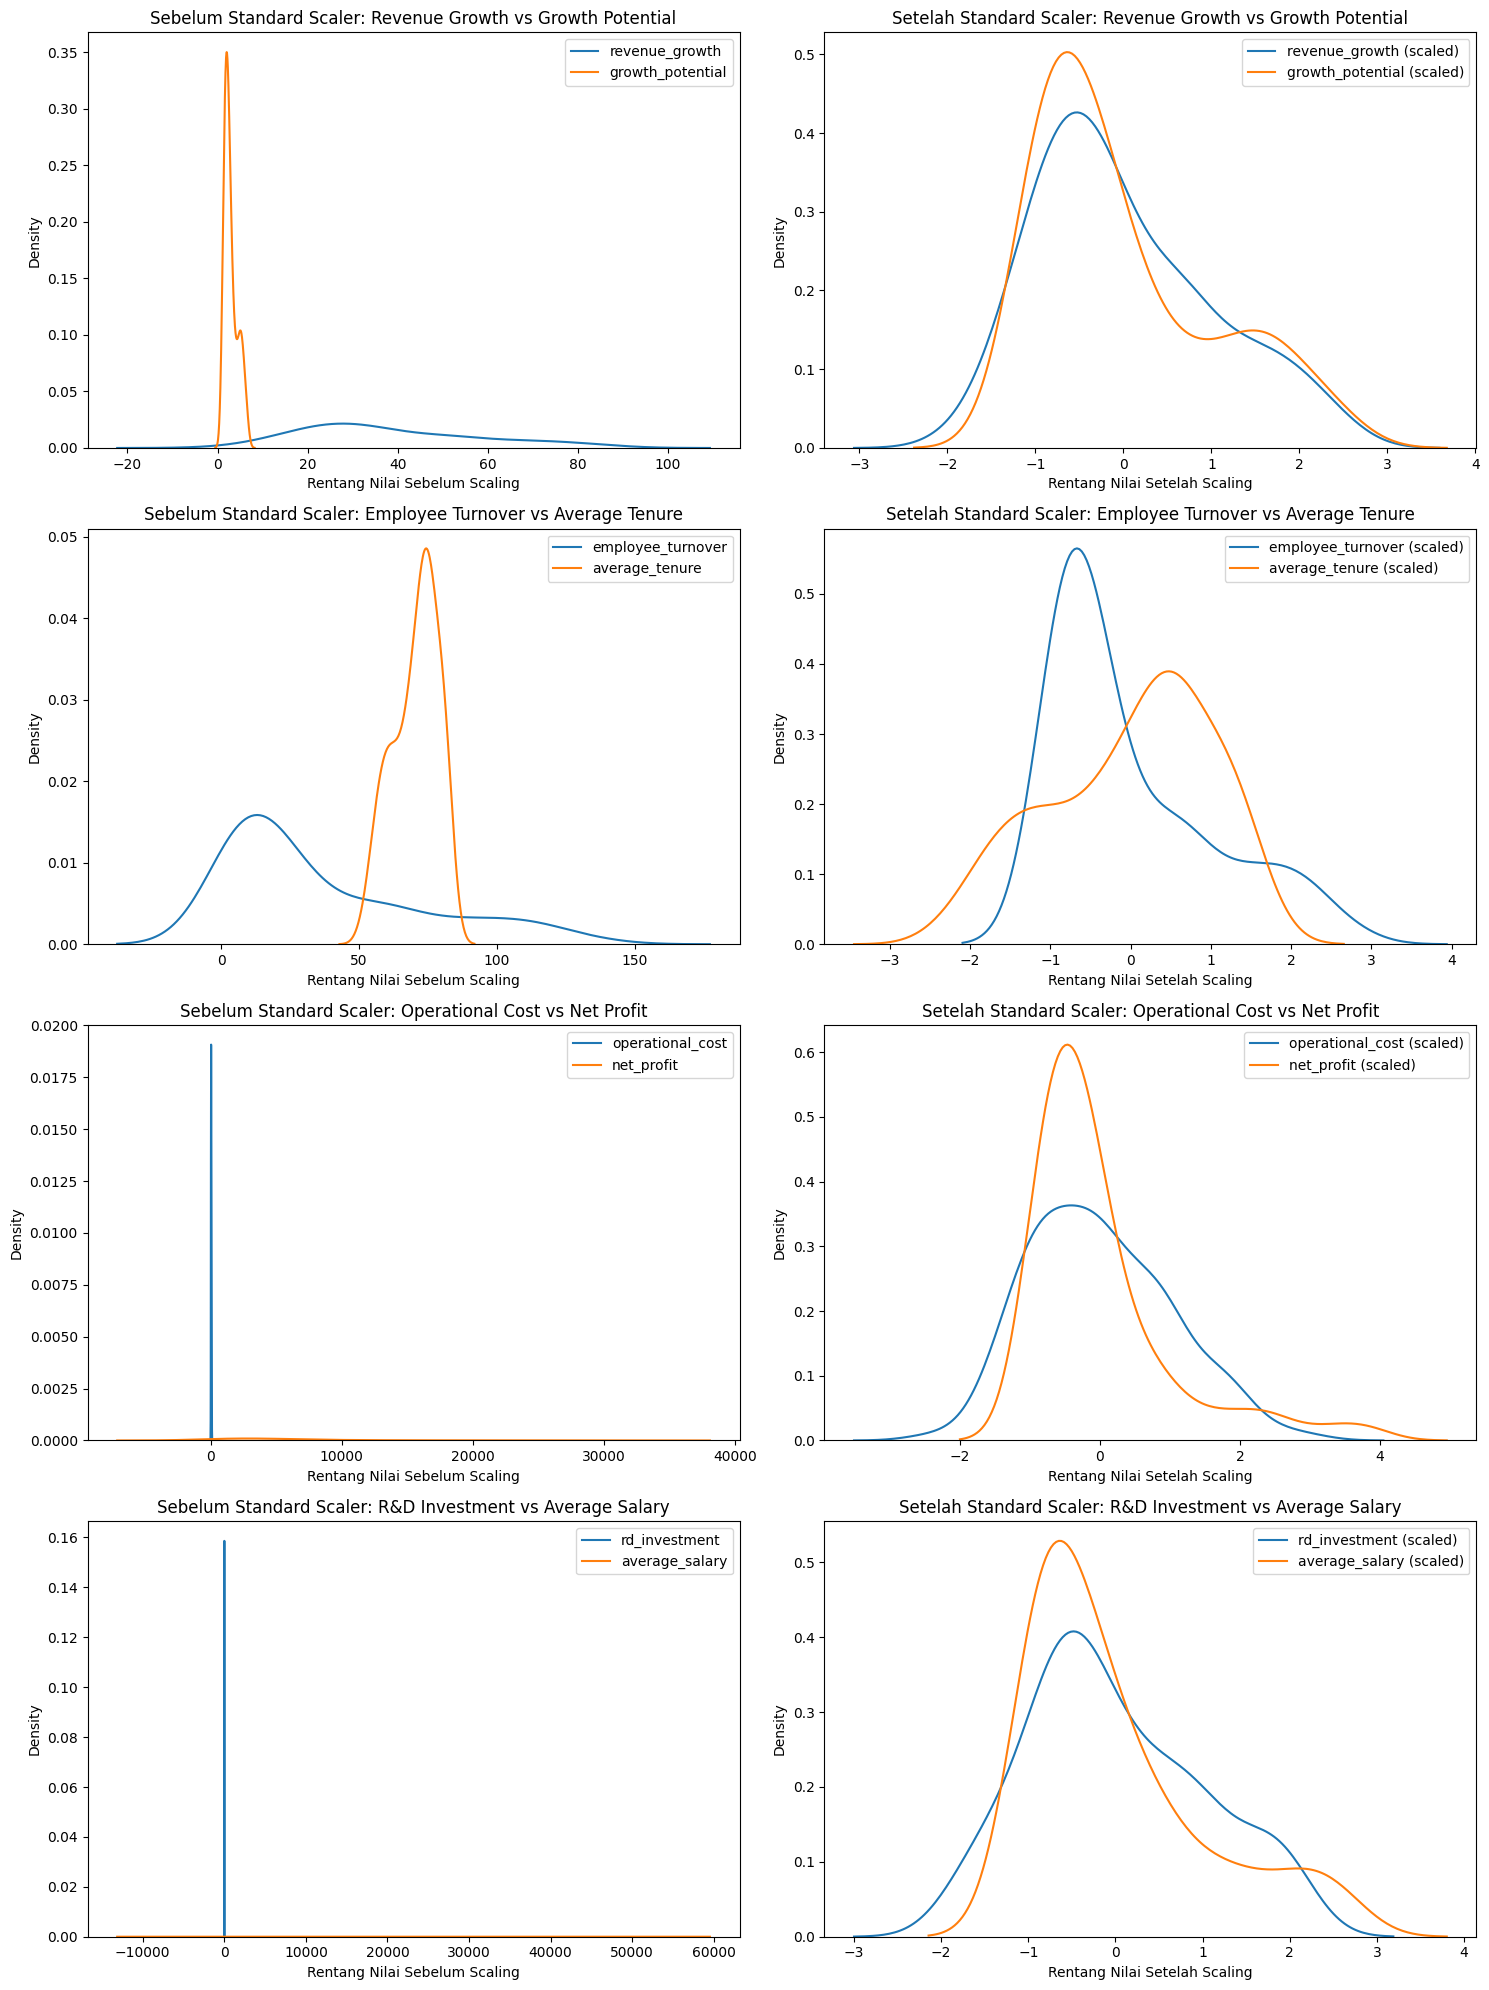

In [128]:
# Kolom-kolom yang akan distandarisasi dengan StandardScaler
columns_to_stdscaller = ['revenue_growth', 'growth_potential', 'employee_turnover', 'average_tenure',
                         'operational_cost', 'net_profit', 'rd_investment', 'average_salary']

# Menerapkan standardisasi ke data pelatihan (train)
train_company[['revenue_growth_stds', 'growth_potential_stds', 'employee_turnover_stds', 'average_tenure_stds',
               'operational_cost_stds', 'net_profit_stds', 'rd_investment_stds', 'average_salary_stds']] = scaler.fit_transform(train_company[columns_to_stdscaller])

# Menerapkan standardisasi yang sama ke data uji (test)
test_company[['revenue_growth_stds', 'growth_potential_stds', 'employee_turnover_stds', 'average_tenure_stds',
              'operational_cost_stds', 'net_profit_stds', 'rd_investment_stds', 'average_salary_stds']] = scaler.transform(test_company[columns_to_stdscaller])

# Plot distribusi sebelum dan sesudah Standard Scaler
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Plot revenue_growth vs growth_potential
axes[0,0].set_title('Sebelum Standard Scaler: Revenue Growth vs Growth Potential')
sns.kdeplot(train_company['revenue_growth'], ax=axes[0,0], label='revenue_growth')
sns.kdeplot(train_company['growth_potential'], ax=axes[0,0], label='growth_potential')
axes[0,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[0,0].legend()

axes[0,1].set_title('Setelah Standard Scaler: Revenue Growth vs Growth Potential')
sns.kdeplot(train_company['revenue_growth_stds'], ax=axes[0,1], label='revenue_growth (scaled)')
sns.kdeplot(train_company['growth_potential_stds'], ax=axes[0,1], label='growth_potential (scaled)')
axes[0,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[0,1].legend()

# Plot employee_turnover vs average_tenure
axes[1,0].set_title('Sebelum Standard Scaler: Employee Turnover vs Average Tenure')
sns.kdeplot(train_company['employee_turnover'], ax=axes[1,0], label='employee_turnover')
sns.kdeplot(train_company['average_tenure'], ax=axes[1,0], label='average_tenure')
axes[1,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[1,0].legend()

axes[1,1].set_title('Setelah Standard Scaler: Employee Turnover vs Average Tenure')
sns.kdeplot(train_company['employee_turnover_stds'], ax=axes[1,1], label='employee_turnover (scaled)')
sns.kdeplot(train_company['average_tenure_stds'], ax=axes[1,1], label='average_tenure (scaled)')
axes[1,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[1,1].legend()

# Plot operational_cost vs net_profit
axes[2,0].set_title('Sebelum Standard Scaler: Operational Cost vs Net Profit')
sns.kdeplot(train_company['operational_cost'], ax=axes[2,0], label='operational_cost')
sns.kdeplot(train_company['net_profit'], ax=axes[2,0], label='net_profit')
axes[2,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[2,0].legend()

axes[2,1].set_title('Setelah Standard Scaler: Operational Cost vs Net Profit')
sns.kdeplot(train_company['operational_cost_stds'], ax=axes[2,1], label='operational_cost (scaled)')
sns.kdeplot(train_company['net_profit_stds'], ax=axes[2,1], label='net_profit (scaled)')
axes[2,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[2,1].legend()

# Plot rd_investment vs average_salary
axes[3,0].set_title('Sebelum Standard Scaler: R&D Investment vs Average Salary')
sns.kdeplot(train_company['rd_investment'], ax=axes[3,0], label='rd_investment')
sns.kdeplot(train_company['average_salary'], ax=axes[3,0], label='average_salary')
axes[3,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[3,0].legend()

axes[3,1].set_title('Setelah Standard Scaler: R&D Investment vs Average Salary')
sns.kdeplot(train_company['rd_investment_stds'], ax=axes[3,1], label='rd_investment (scaled)')
sns.kdeplot(train_company['average_salary_stds'], ax=axes[3,1], label='average_salary (scaled)')
axes[3,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[3,1].legend()

plt.tight_layout()
plt.show()


# MinMaxScaller

In [129]:
from sklearn.preprocessing import MinMaxScaler

# Kolom-kolom yang ingin dinormalisasi
columns_to_normalize = ['revenue_growth', 'growth_potential']

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

In [130]:
# Menerapkan normalisasi Min-Max ke data pelatihan (train)
train_company[['revenue_growth_minmax', 'growth_potential_minmax']] = minmax.fit_transform(train_company[columns_to_normalize])

# Menerapkan normalisasi Min-Max yang sama ke data uji (test)
test_company[['revenue_growth_minmax', 'growth_potential_minmax']] = minmax.transform(test_company[columns_to_normalize])

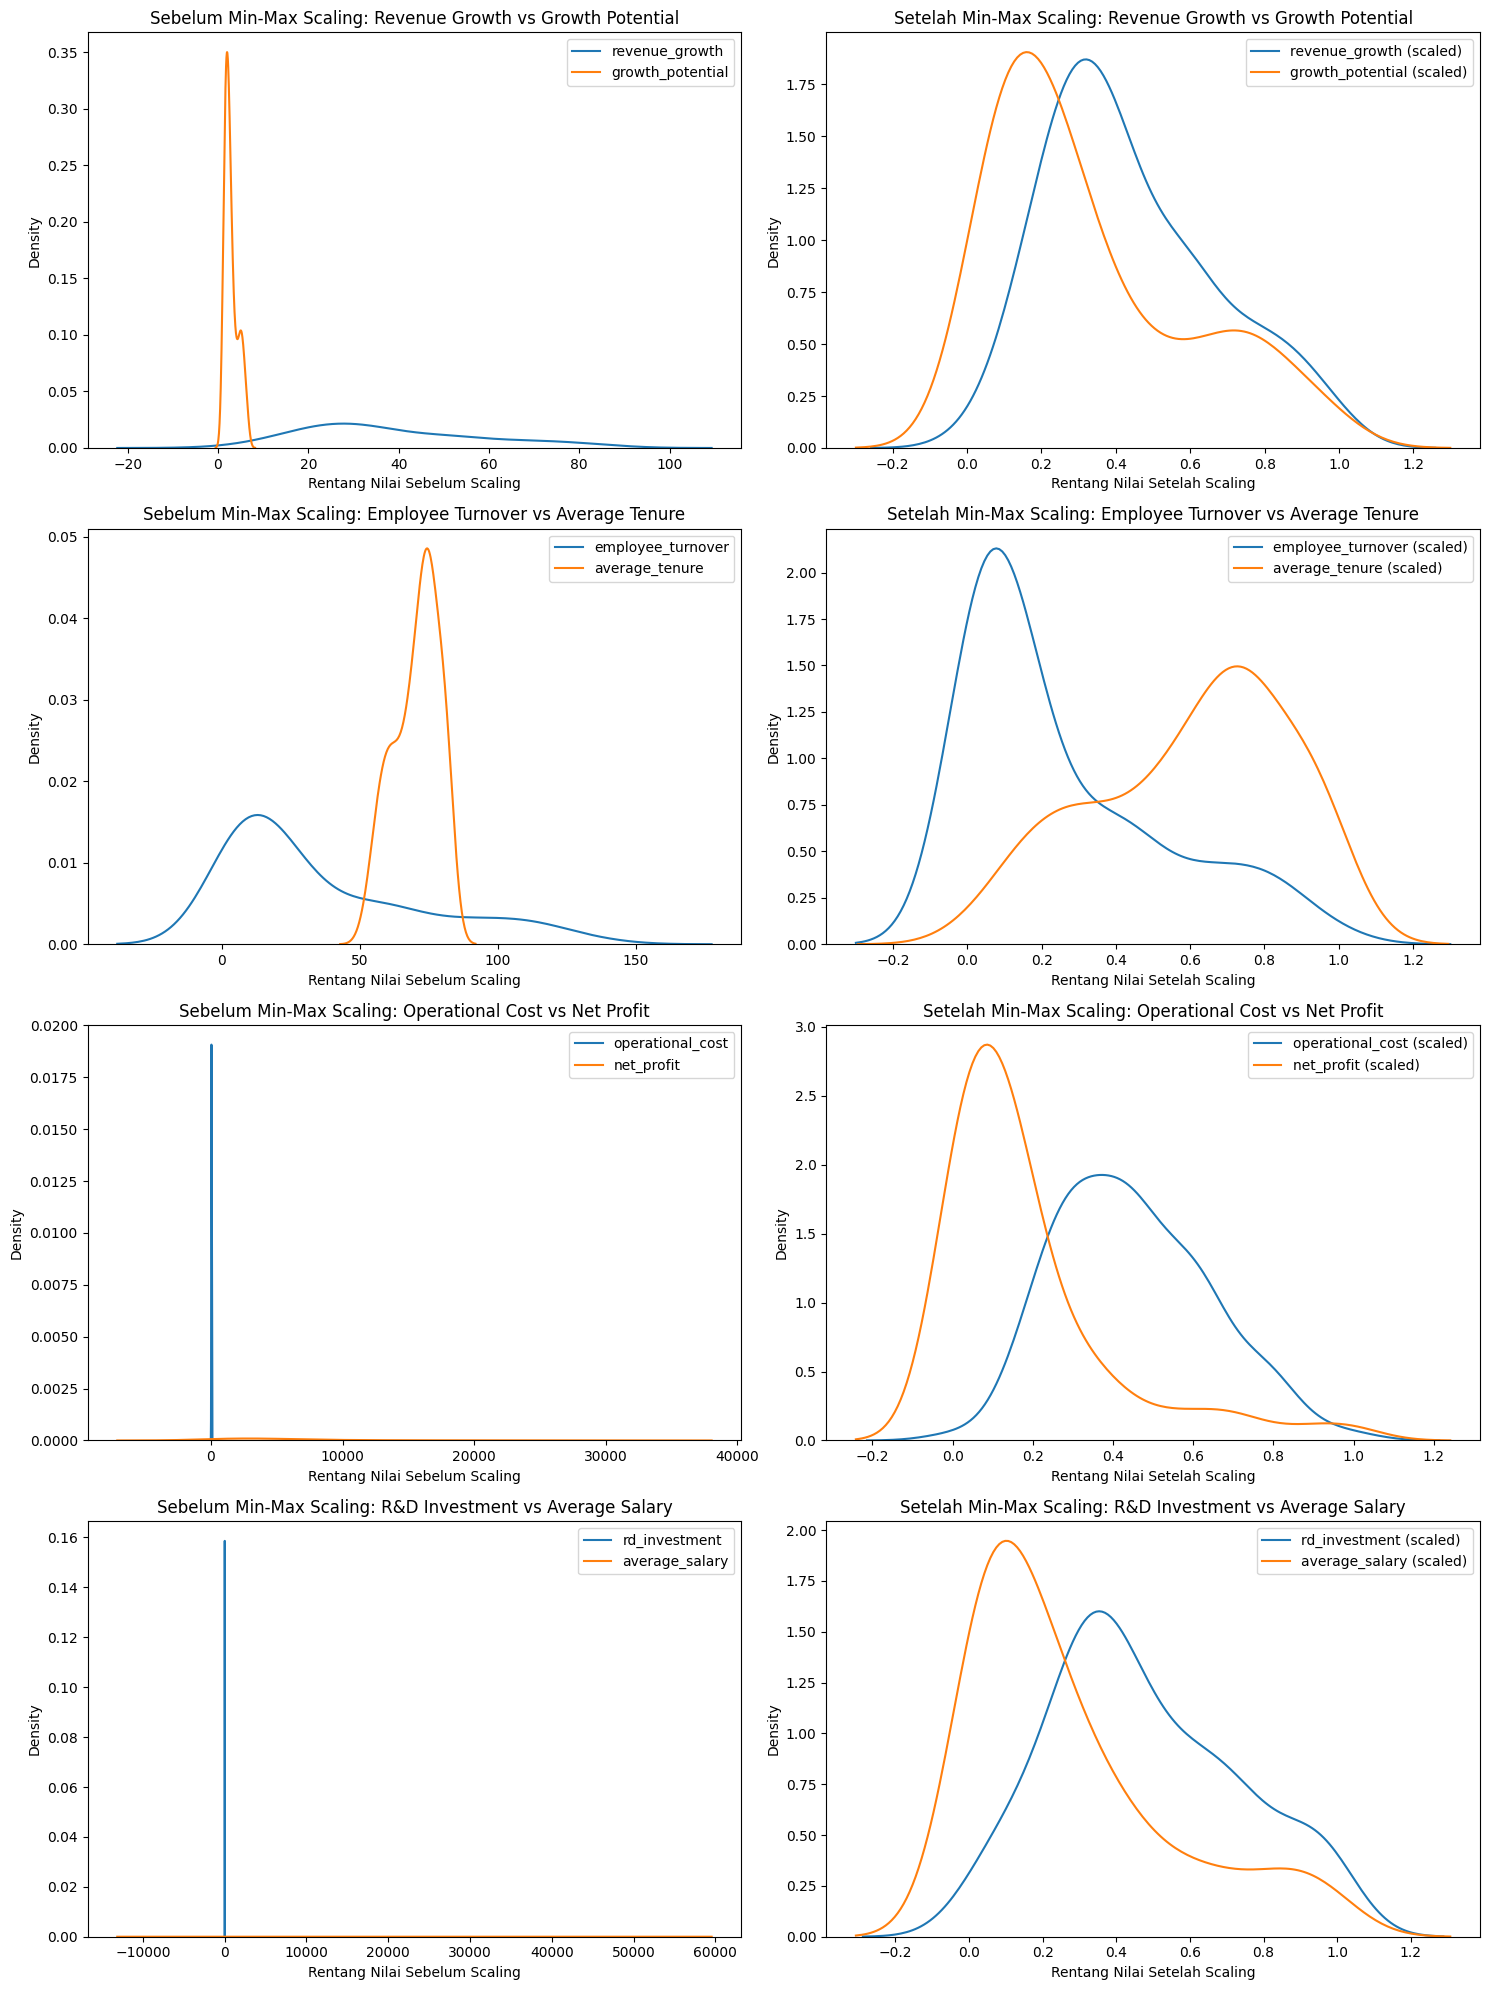

In [131]:
# Kolom-kolom yang akan dinormalisasi dengan MinMaxScaler
columns_to_normalize = ['revenue_growth', 'growth_potential', 'employee_turnover', 'average_tenure',
                        'operational_cost', 'net_profit', 'rd_investment', 'average_salary']

# Menerapkan MinMaxScaler ke data pelatihan (train)
train_company[['revenue_growth_minmax', 'growth_potential_minmax', 'employee_turnover_minmax', 'average_tenure_minmax',
               'operational_cost_minmax', 'net_profit_minmax', 'rd_investment_minmax', 'average_salary_minmax']] = minmax.fit_transform(train_company[columns_to_normalize])

# Menerapkan MinMaxScaler yang sama ke data uji (test)
test_company[['revenue_growth_minmax', 'growth_potential_minmax', 'employee_turnover_minmax', 'average_tenure_minmax',
              'operational_cost_minmax', 'net_profit_minmax', 'rd_investment_minmax', 'average_salary_minmax']] = minmax.transform(test_company[columns_to_normalize])

# Plot distribusi sebelum dan sesudah Min-Max Scaling
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Plot revenue_growth vs growth_potential
axes[0,0].set_title('Sebelum Min-Max Scaling: Revenue Growth vs Growth Potential')
sns.kdeplot(train_company['revenue_growth'], ax=axes[0,0], label='revenue_growth')
sns.kdeplot(train_company['growth_potential'], ax=axes[0,0], label='growth_potential')
axes[0,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[0,0].legend()

axes[0,1].set_title('Setelah Min-Max Scaling: Revenue Growth vs Growth Potential')
sns.kdeplot(train_company['revenue_growth_minmax'], ax=axes[0,1], label='revenue_growth (scaled)')
sns.kdeplot(train_company['growth_potential_minmax'], ax=axes[0,1], label='growth_potential (scaled)')
axes[0,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[0,1].legend()

# Plot employee_turnover vs average_tenure
axes[1,0].set_title('Sebelum Min-Max Scaling: Employee Turnover vs Average Tenure')
sns.kdeplot(train_company['employee_turnover'], ax=axes[1,0], label='employee_turnover')
sns.kdeplot(train_company['average_tenure'], ax=axes[1,0], label='average_tenure')
axes[1,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[1,0].legend()

axes[1,1].set_title('Setelah Min-Max Scaling: Employee Turnover vs Average Tenure')
sns.kdeplot(train_company['employee_turnover_minmax'], ax=axes[1,1], label='employee_turnover (scaled)')
sns.kdeplot(train_company['average_tenure_minmax'], ax=axes[1,1], label='average_tenure (scaled)')
axes[1,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[1,1].legend()

# Plot operational_cost vs net_profit
axes[2,0].set_title('Sebelum Min-Max Scaling: Operational Cost vs Net Profit')
sns.kdeplot(train_company['operational_cost'], ax=axes[2,0], label='operational_cost')
sns.kdeplot(train_company['net_profit'], ax=axes[2,0], label='net_profit')
axes[2,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[2,0].legend()

axes[2,1].set_title('Setelah Min-Max Scaling: Operational Cost vs Net Profit')
sns.kdeplot(train_company['operational_cost_minmax'], ax=axes[2,1], label='operational_cost (scaled)')
sns.kdeplot(train_company['net_profit_minmax'], ax=axes[2,1], label='net_profit (scaled)')
axes[2,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[2,1].legend()

# Plot rd_investment vs average_salary
axes[3,0].set_title('Sebelum Min-Max Scaling: R&D Investment vs Average Salary')
sns.kdeplot(train_company['rd_investment'], ax=axes[3,0], label='rd_investment')
sns.kdeplot(train_company['average_salary'], ax=axes[3,0], label='average_salary')
axes[3,0].set_xlabel('Rentang Nilai Sebelum Scaling')
axes[3,0].legend()

axes[3,1].set_title('Setelah Min-Max Scaling: R&D Investment vs Average Salary')
sns.kdeplot(train_company['rd_investment_minmax'], ax=axes[3,1], label='rd_investment (scaled)')
sns.kdeplot(train_company['average_salary_minmax'], ax=axes[3,1], label='average_salary (scaled)')
axes[3,1].set_xlabel('Rentang Nilai Setelah Scaling')
axes[3,1].legend()

plt.tight_layout()
plt.show()


In [132]:
train_company[['revenue_growth_minmax','growth_potential_minmax']].describe()

revenue_growth_minmax  growth_potential_minmax
count             133.000000               133.000000
mean                0.439809                 0.329030
std                 0.228812                 0.264952
min                 0.000000                 0.000000
25%                 0.272966                 0.130515
50%                 0.402012                 0.244485
75%                 0.588667                 0.494485
max                 1.000000                 1.000000

### Training Regression Model



In [133]:
# menginisiasi object lm --> dari class LinearRegression
lm = LinearRegression()

In [134]:
# melakukan training dengan menggunakan X_train dan y_train
lm.fit(X_train,y_train)

LinearRegression()

In [135]:
print("intercept dari model kita: ", lm.intercept_)

intercept dari model kita:  -0.07423809202626964


In [136]:
print("coefficient dari linear model kita: ", lm.coef_)

coefficient dari linear model kita:  [ 1.04879329e-05  7.55002546e-04  2.15380128e-03 -3.69932205e-04
  1.67585659e-06 -7.90755095e-04  1.46255468e-03  1.71355376e-03
  3.56949788e-07 -1.00763171e-04 -1.31892601e-01]


In [137]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['Coefficients'])
cdf

Coefficients
employee_turnover       1.048793e-05
revenue_growth          7.550025e-04
rd_investment           2.153801e-03
operational_cost       -3.699322e-04
average_salary          1.675857e-06
market_volatility      -7.907551e-04
average_tenure          1.462555e-03
growth_potential        1.713554e-03
net_profit              3.569498e-07
net_profit_margin      -1.007632e-04
operational_efficiency -1.318926e-01

### Training Result Analysis

Coefficient, standard error, and T-statistic for each predictor

In [138]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [139]:
# Hitung residual error dan standard error
n = X_train.shape[0]  # jumlah data training
k = X_train.shape[1]  # jumlah fitur
dfN = n - k           # derajat kebebasan (n - jumlah parameter)

# Prediksi dan error
train_pred = lm.predict(X_train)
y_train = np.ravel(y_train)  # pastikan y_train bentuk 1D
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Hitung standard error untuk tiap koefisien
se = np.zeros(k)  # inisialisasi array SE yang dinamis sesuai jumlah fitur
for i in range(k):
    mse = sum_error / dfN
    denom = np.sum((X_train.iloc[:, i] - X_train.iloc[:, i].mean()) ** 2)
    se[i] = np.sqrt(mse / denom)

# Buat DataFrame hasil
cdf = pd.DataFrame()
cdf['Features'] = X_train.columns
cdf['Coefficients'] = lm.coef_
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

# Tampilkan hasil
print(cdf)

                  Features  Coefficients  Standard Error  t-statistic
0        employee_turnover  1.048793e-05    6.437315e-05     0.162924
1           revenue_growth  7.550025e-04    1.121968e-04     6.729271
2            rd_investment  2.153801e-03    8.929544e-04     2.411995
3         operational_cost -3.699322e-04    1.210704e-04    -3.055514
4           average_salary  1.675857e-06    2.003960e-07     8.362726
5        market_volatility -7.907551e-04    3.841890e-04    -2.058245
6           average_tenure  1.462555e-03    2.915936e-04     5.015731
7         growth_potential  1.713554e-03    1.578311e-03     1.085689
8               net_profit  3.569498e-07    3.676065e-07     0.971010
9        net_profit_margin -1.007632e-04    1.424483e-04    -0.707366
10  operational_efficiency -1.318926e-01    5.595581e-02    -2.357085


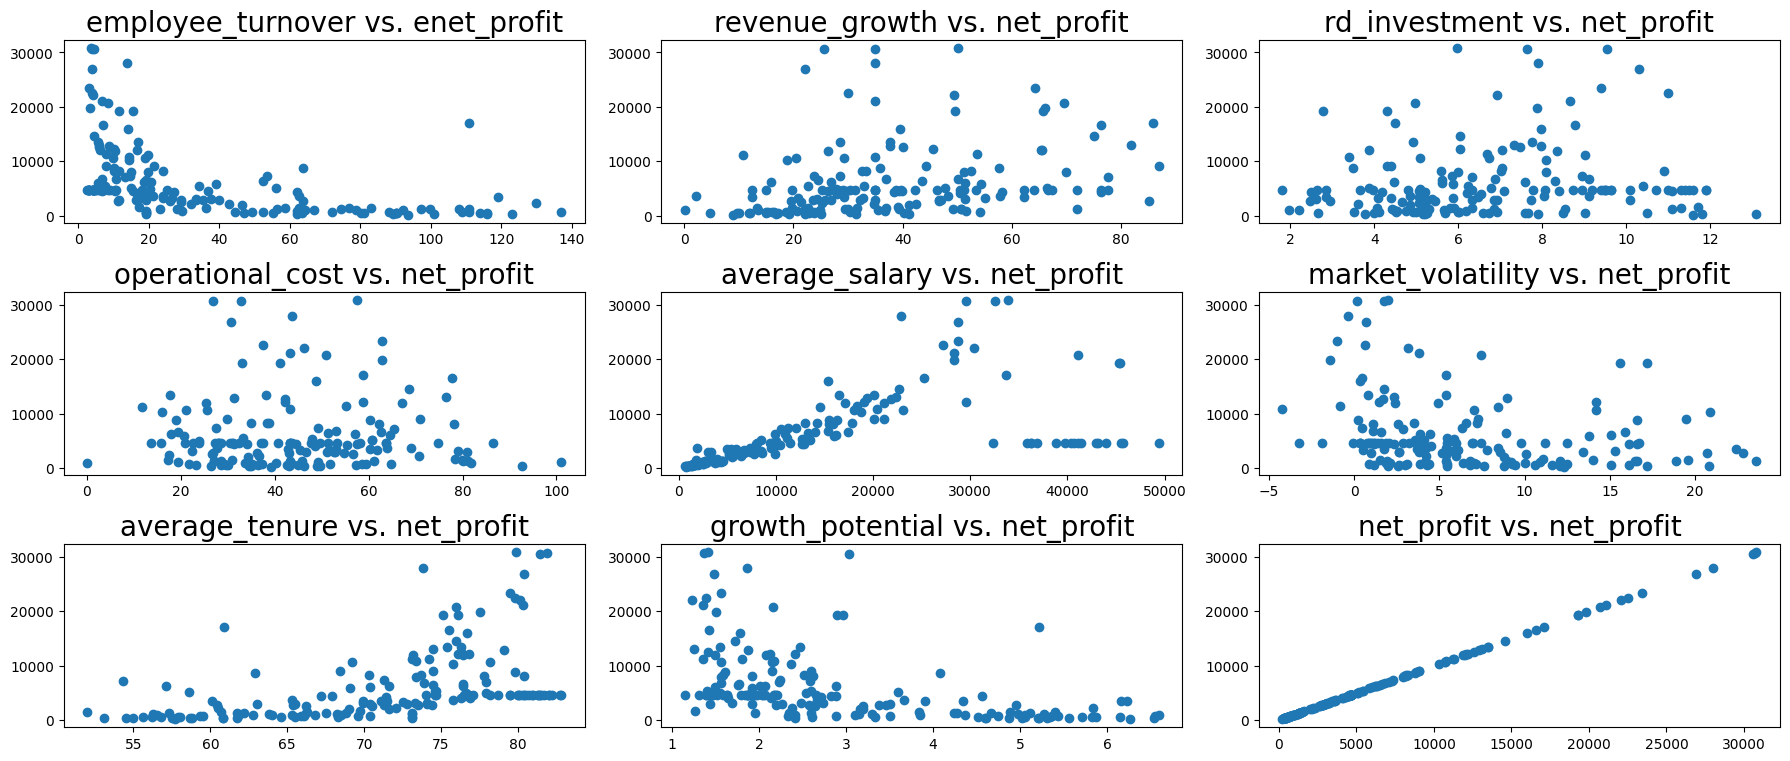

In [140]:
# Asumsikan 'cdf['Features']' berisi nama-nama fitur
l = list(cdf['Features'])  # Ganti 'cdf.index' dengan 'cdf['Features']' untuk nama-nama fitur

# Buat figure dan grid untuk visualisasi
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(4, 3)

# Plot masing-masing fitur vs employee_turnover
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]], df['net_profit'])
ax0.set_title(f"{l[0]} vs. enet_profit", fontdict={'fontsize': 20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]], df['net_profit'])
ax1.set_title(f"{l[1]} vs. net_profit", fontdict={'fontsize': 20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]], df['net_profit'])
ax2.set_title(f"{l[2]} vs. net_profit", fontdict={'fontsize': 20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]], df['net_profit'])
ax3.set_title(f"{l[3]} vs. net_profit", fontdict={'fontsize': 20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]], df['net_profit'])
ax4.set_title(f"{l[4]} vs. net_profit", fontdict={'fontsize': 20})

ax5 = plt.subplot(gs[5])
ax5.scatter(df[l[5]], df['net_profit'])
ax5.set_title(f"{l[5]} vs. net_profit", fontdict={'fontsize': 20})

ax6 = plt.subplot(gs[6])
ax6.scatter(df[l[6]], df['net_profit'])
ax6.set_title(f"{l[6]} vs. net_profit", fontdict={'fontsize': 20})

ax7 = plt.subplot(gs[7])
ax7.scatter(df[l[7]], df['net_profit'])
ax7.set_title(f"{l[7]} vs. net_profit", fontdict={'fontsize': 20})

ax8 = plt.subplot(gs[8])
ax8.scatter(df[l[8]], df['net_profit'])
ax8.set_title(f"{l[8]} vs. net_profit", fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()


### Evaluasi Model dan Uji Asumsi
Setelah melakukan training dan menghasilkan hasil evaluasi, kita perlu melakukan uji asumsi agar dapat memastikan bahwa model kita dapat diandalkan dan valid

In [141]:
predictions = lm.predict(X_test) #uji model menggunakan data test

# menghitung residual dari hasil regresi kita
residuals = (y_test - predictions)

residuals

144    0.016186
65     0.018250
158    0.050400
142   -0.014685
89    -0.034814
86    -0.015929
159   -0.075359
132    0.003980
163   -0.009219
150    0.004687
42    -0.007569
121   -0.026085
128   -0.045769
141    0.015124
153   -0.002476
62    -0.017155
148   -0.014906
119   -0.029677
23     0.038333
149    0.135845
41    -0.022507
36    -0.007746
72    -0.020579
53     0.029291
31    -0.014873
130   -0.022291
147   -0.002000
156   -0.006240
33    -0.026747
37     0.013446
8     -0.003693
138   -0.027196
152   -0.020848
20    -0.022431
28    -0.005346
13    -0.004176
74    -0.002004
24    -0.023020
85    -0.018502
133   -0.020894
115   -0.048163
93     0.010082
125   -0.012128
166    0.008416
7     -0.078575
110   -0.016116
4     -0.014751
19    -0.017927
87    -0.007152
29    -0.083212
35    -0.012630
Name: financial_health_score_normalized, dtype: float64

In [142]:
# melakukan uji normalitas dengan shapiro wilk
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print("shapiro test stat : ", shapiro_test_stat)
print("shapiro p value :", shapiro_p_value)

shapiro test stat :  0.8430619174388598
shapiro p value : 8.495703334661466e-06


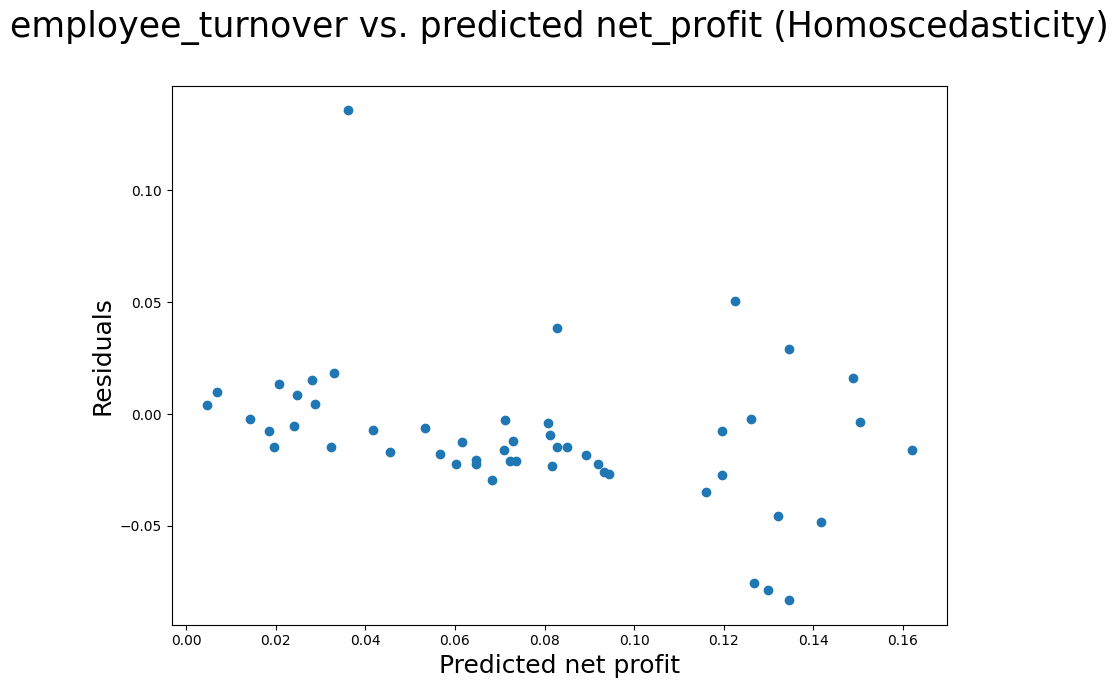

In [143]:
plt.figure(figsize=(10,7))
plt.title("employee_turnover vs. predicted net_profit (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted net profit",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

* Residuals yaitu selisih antara nilai aktual dan prediksi.
* Penyebaran residual terlihat cukup merata di sekitar nol, tanpa pola tertentu yang jelas.
* Tidak ada pola kipas atau pola berbentuk parabola, yang berarti homoskedastisitas cukup terpenuhi.
* tetapi ada sedikit outlier artiny "Model terlalu meremehkan atau melebihkan  harga rumah (harga asli jauh lebih tinggi dari prediksi) atau (harga asli jauh lebih rendah dari pada prediksi)."

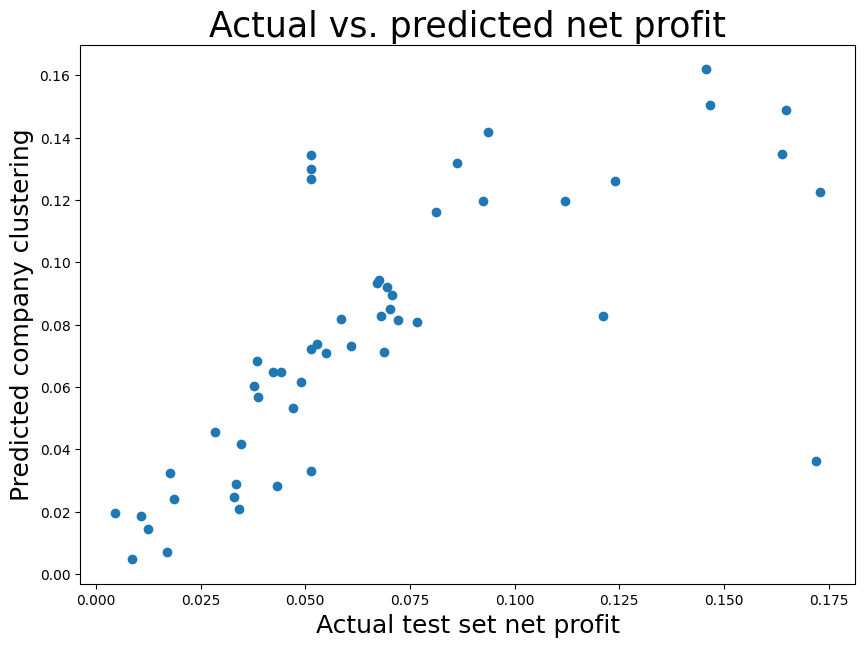

In [146]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted net profit",fontsize=25)
plt.xlabel("Actual test set net profit",fontsize=18)
plt.ylabel("Predicted company clustering", fontsize=18)
plt.scatter(x=y_test,y=predictions)

Model cukup baik dalam memprediksi harga rumah secara umum walau ada beberapa outlier

hasil evaluasi dengan melihat MAE, RMSE, R^2

In [148]:
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared test:", round(metrics.r2_score(y_test,predictions),3))
print("R-squared train:", round(metrics.r2_score(y_train,lm.predict(X_train)),3))

MAE: 0.023518256040214413
RMSE: 0.03381273797275864
R-squared test: 0.4
R-squared train: 0.744


**1. MAE dan RMSE:**

- Nilai MAE dan RMSE yang relatif kecil menunjukkan bahwa secara rata-rata, prediksi model cukup dekat dengan nilai aktual. Ini menandakan bahwa kesalahan absolut dan kuadrat tidak terlalu besar.

- Namun, nilai RMSE yang lebih besar dari MAE mengindikasikan adanya beberapa prediksi yang meleset cukup jauh (karena RMSE lebih sensitif terhadap outlier).

**2. R-squared (R²):**

- R² pada data uji (0.4) berarti sekitar 40% variasi dalam data target dapat dijelaskan oleh model pada data yang belum pernah dilihat sebelumnya. Ini termasuk kategori moderat, dan bisa menunjukkan bahwa model masih bisa ditingkatkan.

- R² pada data latih (0.744) berarti model mampu menjelaskan 66.1% variasi pada data pelatihan, yang lebih tinggi dibanding data uji.

- Perbedaan antara nilai R² train dan test menunjukkan potensi overfitting ringan, di mana model lebih baik dalam menjelaskan data latih dibandingkan data uji.